### 환경설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 코랩 환경 한글 글꼴 설치, 설치 후 런타임 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,020 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121654 files and dire

#[1] 데이터 및 모듈 준비

In [1]:
import pandas as pd
import numpy as np
import random
import os

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

In [2]:
ag_result_df = pd.read_csv('/content/drive/MyDrive/ASAC_최종프로젝트/★ 한석 ★/3.경제지표데이터/autogluon_result.csv', encoding = 'utf-8')
ag_valid_result_df = pd.read_csv('/content/drive/MyDrive/ASAC_최종프로젝트/★ 한석 ★/3.경제지표데이터/validation_result_ag.csv', encoding = 'cp949', index_col = 'Unnamed: 0')
lstm_result_df = pd.read_csv('/content/drive/MyDrive/ASAC_최종프로젝트/★ 한석 ★/3.경제지표데이터/vecm_lstm_result.csv', encoding='cp949')
lstm_valid_result_df = pd.read_csv('/content/drive/MyDrive/ASAC_최종프로젝트/★ 한석 ★/3.경제지표데이터/vecm_lstm_val.csv', encoding = 'cp949')

eco_df = pd.read_csv('/content/drive/MyDrive/ASAC_최종프로젝트/data/경제지표데이터/finance_final_68.csv', encoding = 'utf-8')

# [2] AutoGluon 결과 확인



## 2-1. Validation

In [3]:
ag_valid_result_df

,Unnamed: 0.1,날짜,기준금리,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3
Unnamed: 0,,,,,,,,,,
0,0,2020-10-01,0.50,0.672221,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-11-01,0.50,0.750395,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-12-01,0.50,0.857892,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2021-01-01,0.50,0.960908,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2021-02-01,0.50,1.053804,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2021-03-01,0.50,1.137119,NaN,NaN,NaN,NaN,NaN,NaN
6,6,2021-04-01,0.50,1.212457,1.253351,NaN,NaN,NaN,NaN,NaN
7,7,2021-05-01,0.50,1.281339,1.212417,NaN,NaN,NaN,NaN,NaN
8,8,2021-06-01,0.50,1.344992,1.293960,NaN,NaN,NaN,NaN,NaN


### 2-1.1 Validation 확인 - 36개월

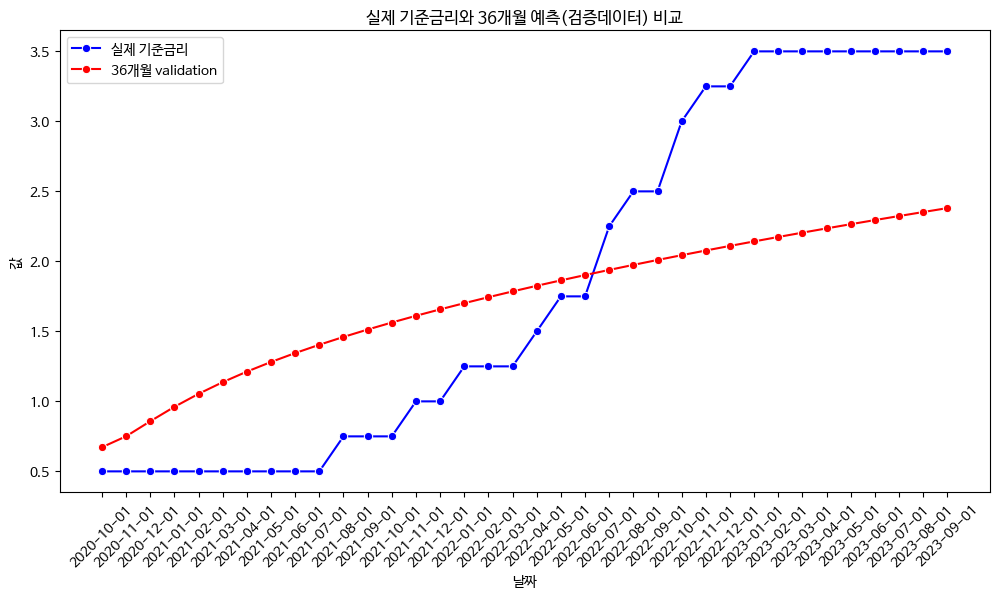

In [4]:
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 라인 그래프 그리기
sns.lineplot(x='날짜', y='기준금리', data=ag_valid_result_df, label='실제 기준금리', marker='o', c = 'b')
sns.lineplot(x='날짜', y='mean_36', data=ag_valid_result_df, label='36개월 validation', marker='o', c = 'r')

plt.title('실제 기준금리와 36개월 예측(검증데이터) 비교')
plt.xlabel('날짜')
plt.ylabel('값')
plt.xticks(rotation=45)  # x축 라벨을 45도 기울임 (선택 사항)
plt.legend()  # 범례 표시

plt.show()

In [6]:
round(sum(abs(ag_valid_result_df['기준금리'] - ag_valid_result_df['mean_36'])) / 36, 2)

0.75

### 2-1.2 Validation 확인 - 30개월

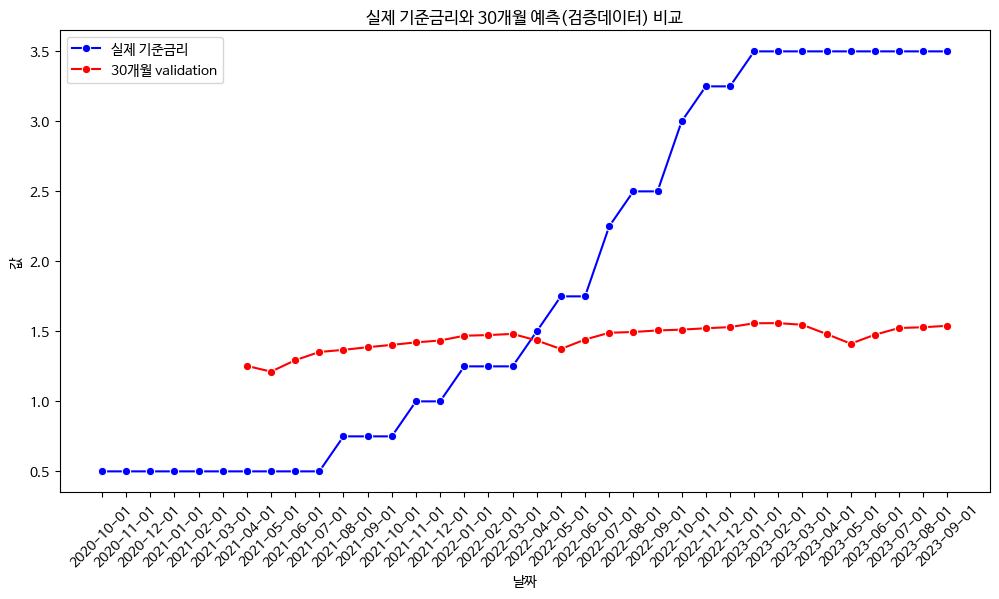

In [ ]:
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 라인 그래프 그리기
sns.lineplot(x='날짜', y='기준금리', data=ag_valid_result_df, label='실제 기준금리', marker='o', c = 'b')
sns.lineplot(x='날짜', y='mean_30', data=ag_valid_result_df, label='30개월 validation', marker='o', c = 'r')

plt.title('실제 기준금리와 30개월 예측(검증데이터) 비교')
plt.xlabel('날짜')
plt.ylabel('값')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [9]:
round(sum(abs(ag_valid_result_df.iloc[6:,:]['기준금리'] - ag_valid_result_df.iloc[6:,:]['mean_30'])) / 30, 2)

1.1

### 2-1.3 Validation 확인 - 24개월

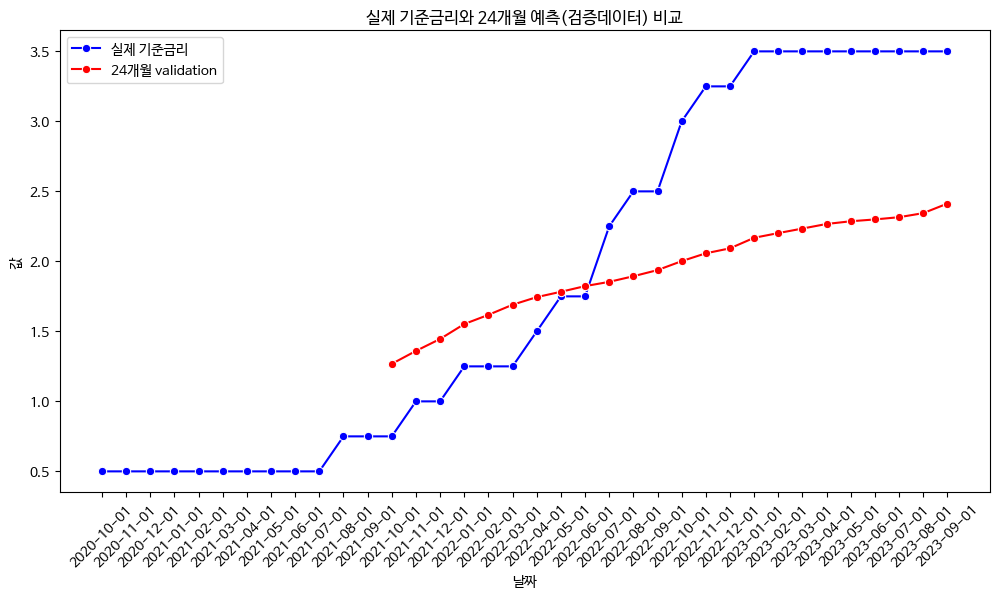

In [ ]:
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 라인 그래프 그리기
sns.lineplot(x='날짜', y='기준금리', data=ag_valid_result_df, label='실제 기준금리', marker='o', c = 'b')
sns.lineplot(x='날짜', y='mean_24', data=ag_valid_result_df, label='24개월 validation', marker='o', c = 'r')

plt.title('실제 기준금리와 24개월 예측(검증데이터) 비교')
plt.xlabel('날짜')
plt.ylabel('값')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [13]:
round(sum(abs(ag_valid_result_df.iloc[12:,:]['기준금리'] - ag_valid_result_df.iloc[12:,:]['mean_24'])) / 24, 2)

0.78

### 2-1.4 Validation 확인 - 18개월

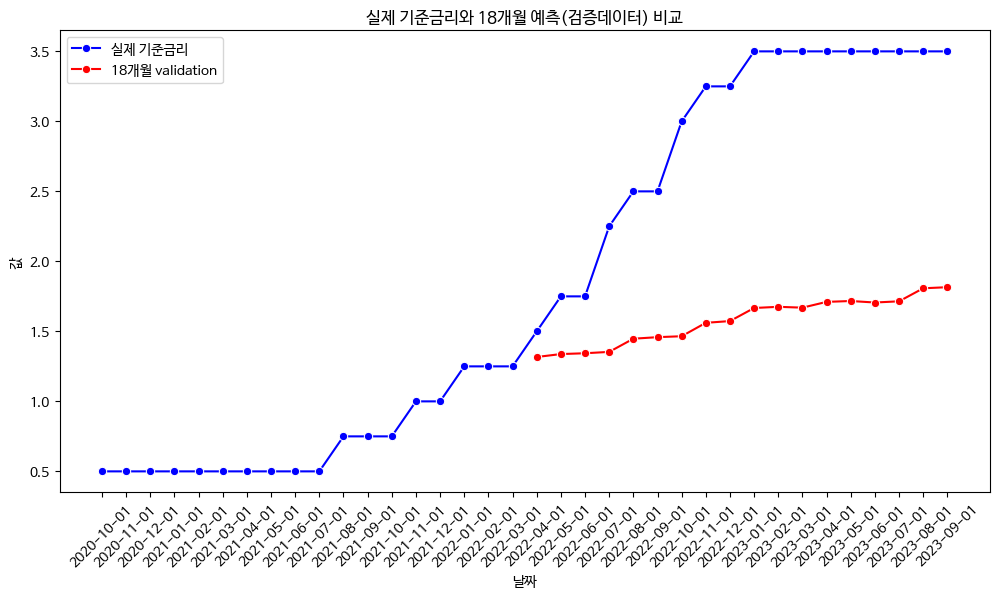

In [ ]:
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 라인 그래프 그리기
sns.lineplot(x='날짜', y='기준금리', data=ag_valid_result_df, label='실제 기준금리', marker='o', c = 'b')
sns.lineplot(x='날짜', y='mean_18', data=ag_valid_result_df, label='18개월 validation', marker='o', c = 'r')

plt.title('실제 기준금리와 18개월 예측(검증데이터) 비교')
plt.xlabel('날짜')
plt.ylabel('값')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [14]:
round(sum(abs(ag_valid_result_df.iloc[18:,:]['기준금리'] - ag_valid_result_df.iloc[18:,:]['mean_18'])) / 18, 2)

1.38

### 2-1.5 Validation 확인 - 12개월

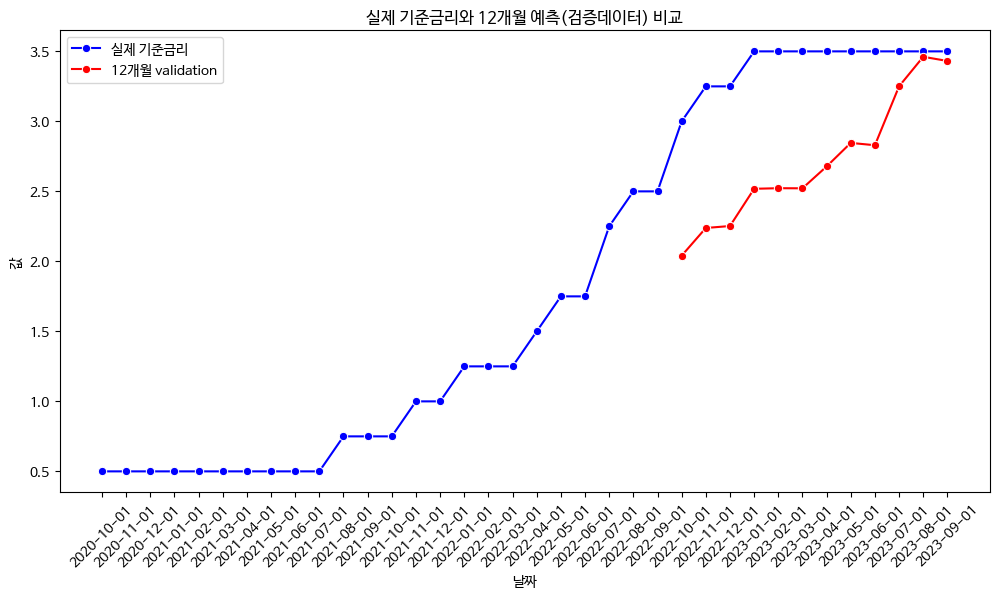

In [15]:
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 라인 그래프 그리기
sns.lineplot(x='날짜', y='기준금리', data=ag_valid_result_df, label='실제 기준금리', marker='o', c = 'b')
sns.lineplot(x='날짜', y='mean_12', data=ag_valid_result_df, label='12개월 validation', marker='o', c = 'r')

plt.title('실제 기준금리와 12개월 예측(검증데이터) 비교')
plt.xlabel('날짜')
plt.ylabel('값')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [17]:
round(sum(abs(ag_valid_result_df.iloc[24:,:]['기준금리'] - ag_valid_result_df.iloc[24:,:]['mean_12'])) / 12, 2)

0.7

### 2-1.6 Validation 확인 - 6개월

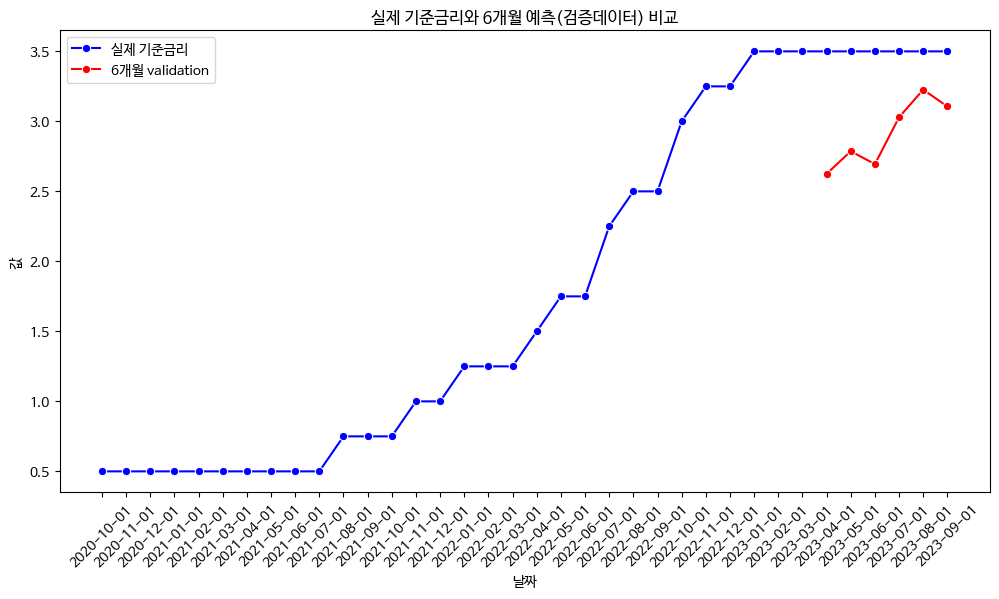

In [ ]:
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 라인 그래프 그리기
sns.lineplot(x='날짜', y='기준금리', data=ag_valid_result_df, label='실제 기준금리', marker='o', c = 'b')
sns.lineplot(x='날짜', y='mean_6', data=ag_valid_result_df, label='6개월 validation', marker='o', c = 'r')

plt.title('실제 기준금리와 6개월 예측(검증데이터) 비교')
plt.xlabel('날짜')
plt.ylabel('값')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [18]:
round(sum(abs(ag_valid_result_df.iloc[30:,:]['기준금리'] - ag_valid_result_df.iloc[30:,:]['mean_6'])) / 6, 2)

0.59

### 2-1.7 Validation 확인 - 3개월

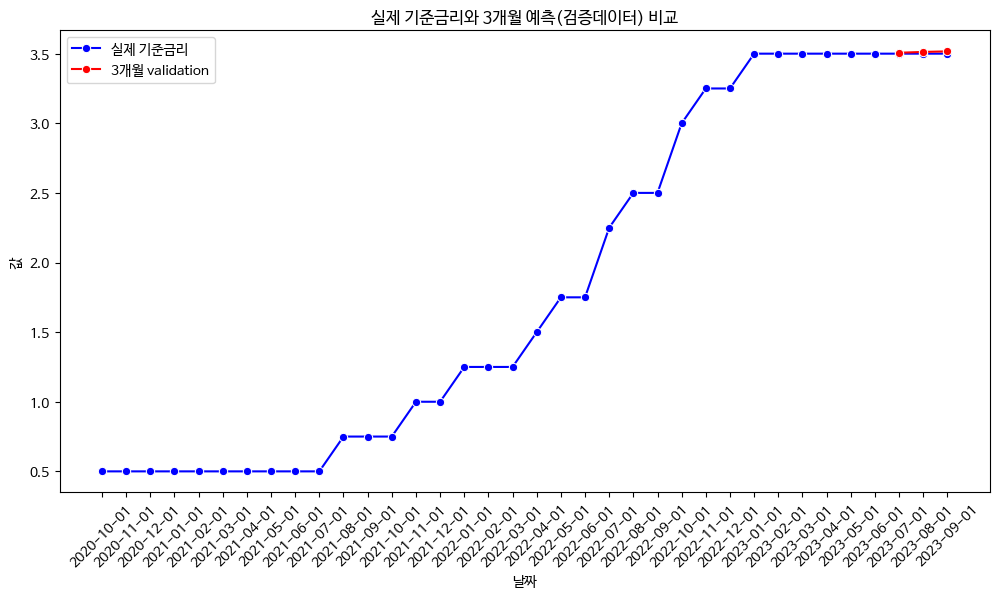

In [ ]:
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 라인 그래프 그리기
sns.lineplot(x='날짜', y='기준금리', data=ag_valid_result_df, label='실제 기준금리', marker='o', c = 'b')
sns.lineplot(x='날짜', y='mean_3', data=ag_valid_result_df, label='3개월 validation', marker='o', c = 'r')

plt.title('실제 기준금리와 3개월 예측(검증데이터) 비교')
plt.xlabel('날짜')
plt.ylabel('값')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [19]:
round(sum(abs(ag_valid_result_df.iloc[33:,:]['기준금리'] - ag_valid_result_df.iloc[33:,:]['mean_3'])) / 3, 2)

0.01

## 2-2. Prediction

In [ ]:
ag_result_df['mean_total'] = ag_result_df[['mean_36', 'mean_30', 'mean_24', 'mean_18', 'mean_12', 'mean_6', 'mean_3']].mean(axis=1, skipna=True)
ag_result_df

,날짜,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3,mean_total
0,2023-10-01,2.638832,4.076467,3.665442,3.632323,3.611118,3.512280,3.499402,3.519409
1,2023-11-01,2.645946,4.215139,3.784327,3.745596,3.646149,3.513914,3.499449,3.578646
2,2023-12-01,2.646012,3.959623,3.583671,3.553075,3.479068,3.511042,3.495574,3.461152
3,2024-01-01,2.740649,3.937733,3.580623,3.461424,3.626589,3.515321,NaN,3.477057
4,2024-02-01,2.713926,3.909883,3.571081,3.409974,3.643641,3.517859,NaN,3.461061
5,2024-03-01,2.717114,3.796897,3.522616,3.203506,3.616816,3.517821,NaN,3.395795
6,2024-04-01,2.726136,3.613310,3.397862,2.934597,3.501292,NaN,NaN,3.234639
7,2024-05-01,2.714119,3.281040,3.230822,2.500344,3.243704,NaN,NaN,2.994006
8,2024-06-01,2.773730,3.087167,3.094351,2.291230,2.402579,NaN,NaN,2.729811
9,2024-07-01,2.688313,2.800168,2.881070,2.000455,1.626975,NaN,NaN,2.399396


In [ ]:

# threshold = 0.25
# ag_result_df['mean_0.25'] = ag_result_df['mean_total'].where((ag_result_df['mean_total'].diff().abs() >= threshold), ag_result_df['mean_total'].shift())
# ag_result_df.at[0, 'mean_0.25'] = ag_result_df.at[0, 'mean_total']
# ag_result_df

### 2-2.1 예측 결과 시각화

In [ ]:
for_plot = eco_df[['날짜', '기준금리']]
for_plot_pred = ag_result_df[['날짜','mean_total']].rename(columns = {'mean_total':'기준금리'})

<ipython-input-14-fca2e9b7c150>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])


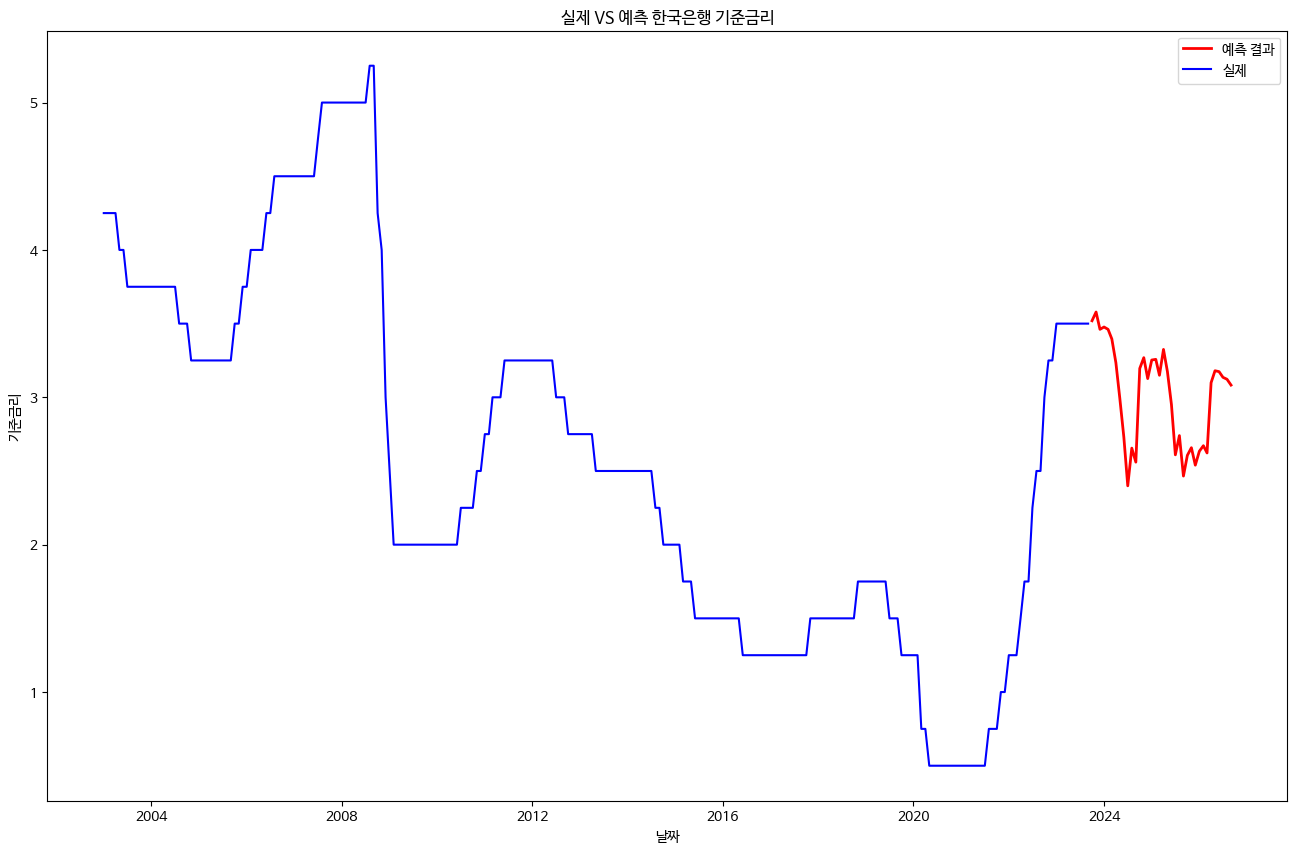

In [ ]:
for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])
for_plot_pred['날짜'] = pd.to_datetime(for_plot_pred['날짜'])

plt.figure(figsize=(16, 10))

plt.plot(for_plot_pred['날짜'], for_plot_pred['기준금리'], label='예측 결과', c = 'r',  linewidth=2)
plt.plot(for_plot['날짜'], for_plot['기준금리'], label='실제', c = 'b')

plt.title('실제 VS 예측 한국은행 기준금리')

plt.xlabel('날짜')

plt.ylabel('기준금리')

plt.legend()

plt.show()

### 2-2.2 0.25 Thresh hold

In [ ]:
threshold = 0.25
ag_result_df['mean_0.25'] = ag_result_df['mean_total'].where((ag_result_df['mean_total'].diff().abs() >= threshold), ag_result_df['mean_total'].shift())
ag_result_df.at[0, 'mean_0.25'] = ag_result_df.at[0, 'mean_total']
ag_result_df

,날짜,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3,mean_total,mean_0.25
0,2023-10-01,2.638832,4.076467,3.665442,3.632323,3.611118,3.512280,3.499402,3.519409,3.519409
1,2023-11-01,2.645946,4.215139,3.784327,3.745596,3.646149,3.513914,3.499449,3.578646,3.519409
2,2023-12-01,2.646012,3.959623,3.583671,3.553075,3.479068,3.511042,3.495574,3.461152,3.578646
3,2024-01-01,2.740649,3.937733,3.580623,3.461424,3.626589,3.515321,NaN,3.477057,3.461152
4,2024-02-01,2.713926,3.909883,3.571081,3.409974,3.643641,3.517859,NaN,3.461061,3.477057
5,2024-03-01,2.717114,3.796897,3.522616,3.203506,3.616816,3.517821,NaN,3.395795,3.461061
6,2024-04-01,2.726136,3.613310,3.397862,2.934597,3.501292,NaN,NaN,3.234639,3.395795
7,2024-05-01,2.714119,3.281040,3.230822,2.500344,3.243704,NaN,NaN,2.994006,3.234639
8,2024-06-01,2.773730,3.087167,3.094351,2.291230,2.402579,NaN,NaN,2.729811,2.729811
9,2024-07-01,2.688313,2.800168,2.881070,2.000455,1.626975,NaN,NaN,2.399396,2.399396


In [ ]:
for_plot = eco_df[['날짜', '기준금리']]
for_plot_pred = ag_result_df[['날짜','mean_0.25']].rename(columns = {'mean_0.25':'기준금리'})

In [ ]:
for i in range(1, len(ag_result_df)):
    diff = ag_result_df.loc[i, 'mean_0.25'] - ag_result_df.loc[i-1, 'mean_0.25']

    # 조건 1: 값이 0.5 이상 작아졌을 때, 0.25만큼만 하락된 값이 반영되도록 스무딩
    if diff <= -0.5:
        ag_result_df.loc[i, 'mean_0.25'] = ag_result_df.loc[i-1, 'mean_0.25'] - 0.25

    # 조건 2: 값이 0.5 이상 커졌을 , 0.25만큼만 상승된 값이 반영되도록 스무딩
    elif diff >= 0.5:
        ag_result_df.loc[i, 'mean_0.25'] = ag_result_df.loc[i-1, 'mean_0.25'] + 0.25

<ipython-input-18-fca2e9b7c150>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])


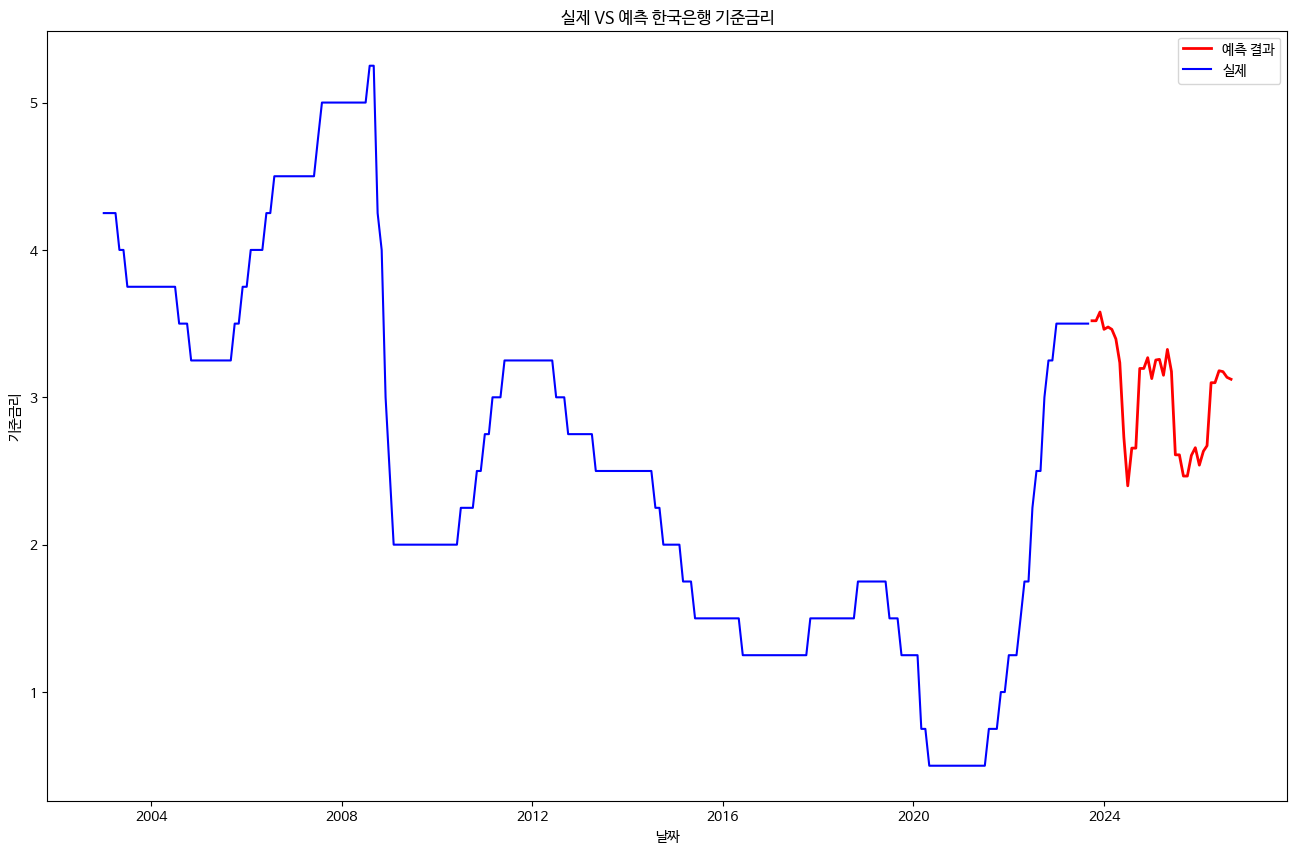

In [ ]:
for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])
for_plot_pred['날짜'] = pd.to_datetime(for_plot_pred['날짜'])

plt.figure(figsize=(16, 10))

plt.plot(for_plot_pred['날짜'], for_plot_pred['기준금리'], label='예측 결과', c = 'r',  linewidth=2)
plt.plot(for_plot['날짜'], for_plot['기준금리'], label='실제', c = 'b')

plt.title('실제 VS 예측 한국은행 기준금리')

plt.xlabel('날짜')

plt.ylabel('기준금리')

plt.legend()

plt.show()

### 2-2.3 mean_total 기준 0.25로 스무딩

In [ ]:
reference_values = np.arange(0, 5, 0.25)

ag_result_df['mean_total_0.25_cut'] = ag_result_df['mean_total'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x)))

ag_result_df

,날짜,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3,mean_total,mean_0.25,mean_total_0.25_cut
0,2023-10-01,2.638832,4.076467,3.665442,3.632323,3.611118,3.512280,3.499402,3.519409,3.519409,3.50
1,2023-11-01,2.645946,4.215139,3.784327,3.745596,3.646149,3.513914,3.499449,3.578646,3.519409,3.50
2,2023-12-01,2.646012,3.959623,3.583671,3.553075,3.479068,3.511042,3.495574,3.461152,3.578646,3.50
3,2024-01-01,2.740649,3.937733,3.580623,3.461424,3.626589,3.515321,NaN,3.477057,3.461152,3.50
4,2024-02-01,2.713926,3.909883,3.571081,3.409974,3.643641,3.517859,NaN,3.461061,3.477057,3.50
5,2024-03-01,2.717114,3.796897,3.522616,3.203506,3.616816,3.517821,NaN,3.395795,3.461061,3.50
6,2024-04-01,2.726136,3.613310,3.397862,2.934597,3.501292,NaN,NaN,3.234639,3.395795,3.25
7,2024-05-01,2.714119,3.281040,3.230822,2.500344,3.243704,NaN,NaN,2.994006,3.234639,3.00
8,2024-06-01,2.773730,3.087167,3.094351,2.291230,2.402579,NaN,NaN,2.729811,2.984639,2.75
9,2024-07-01,2.688313,2.800168,2.881070,2.000455,1.626975,NaN,NaN,2.399396,2.734639,2.50


In [ ]:
for_plot = eco_df[['날짜', '기준금리']]
for_plot_pred = ag_result_df[['날짜','mean_total_0.25_cut']].rename(columns = {'mean_total_0.25_cut':'기준금리'})

<ipython-input-21-fca2e9b7c150>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])


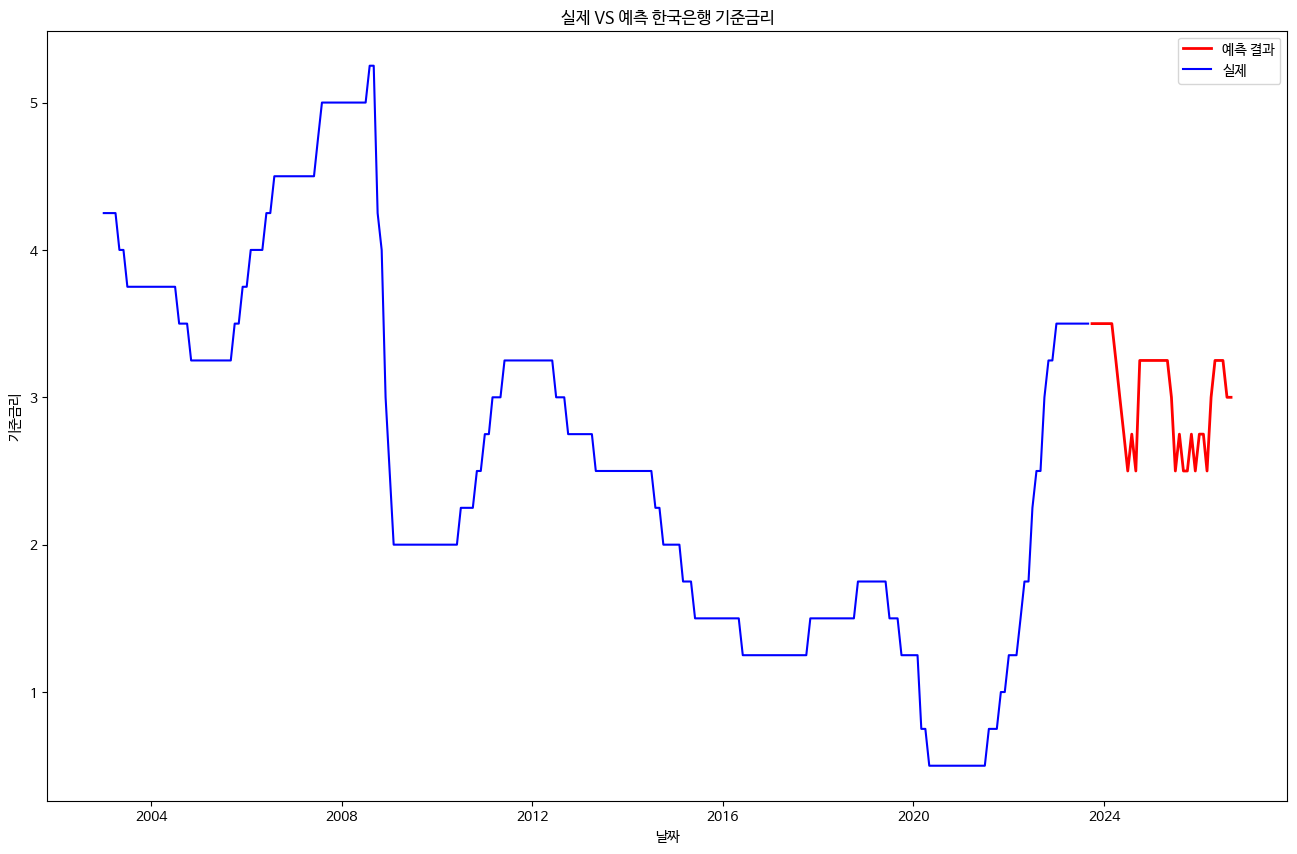

In [ ]:
for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])
for_plot_pred['날짜'] = pd.to_datetime(for_plot_pred['날짜'])

plt.figure(figsize=(16, 10))

plt.plot(for_plot_pred['날짜'], for_plot_pred['기준금리'], label='예측 결과', c = 'r',  linewidth=2)
plt.plot(for_plot['날짜'], for_plot['기준금리'], label='실제', c = 'b')

plt.title('실제 VS 예측 한국은행 기준금리')

plt.xlabel('날짜')

plt.ylabel('기준금리')

plt.legend()

plt.show()

### 2-2.4 0.25 % 단위로 스케일링

In [ ]:
reference_values = np.arange(0, 5, 0.25)
ag_result_df['mean_0.25_cut'] = ag_result_df['mean_0.25'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x)))

ag_result_df['mean_0.25_cut']

0     3.50
1     3.50
2     3.50
3     3.50
4     3.50
5     3.50
6     3.50
7     3.25
8     3.00
9     2.75
10    2.75
11    2.75
12    3.00
13    3.25
14    3.25
15    3.25
16    3.25
17    3.25
18    3.25
19    3.25
20    3.25
21    3.00
22    2.50
23    2.50
24    2.50
25    2.50
26    2.75
27    2.50
28    2.75
29    2.75
30    3.00
31    3.00
32    3.25
33    3.25
34    3.25
35    3.00
Name: mean_0.25_cut, dtype: float64

- 추가로 한번에 0.5 이상의 움직임을 보이는 경우, 바로 이전 값에서 0.25 변한 값으로 반환한다.

In [ ]:
for i in range(1, len(ag_result_df)):
    diff = ag_result_df.loc[i, 'mean_0.25_cut'] - ag_result_df.loc[i-1, 'mean_0.25_cut']

    # 조건 1: 값이 0.5 이상 작아졌을 때, 0.25만큼만 하락된 값이 반영되도록 스무딩
    if diff <= -0.5:
        ag_result_df.loc[i, 'mean_0.25_cut'] = ag_result_df.loc[i-1, 'mean_0.25_cut'] - 0.25

    # 조건 2: 값이 0.5 이상 커졌을 , 0.25만큼만 상승된 값이 반영되도록 스무딩
    elif diff >= 0.5:
        ag_result_df.loc[i, 'mean_0.25_cut'] = ag_result_df.loc[i-1, 'mean_0.25_cut'] + 0.25

In [ ]:
for_plot = eco_df[['날짜', '기준금리']]
for_plot_pred = ag_result_df[['날짜','mean_0.25_cut']].rename(columns = {'mean_0.25_cut':'기준금리'})

<ipython-input-25-fca2e9b7c150>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])


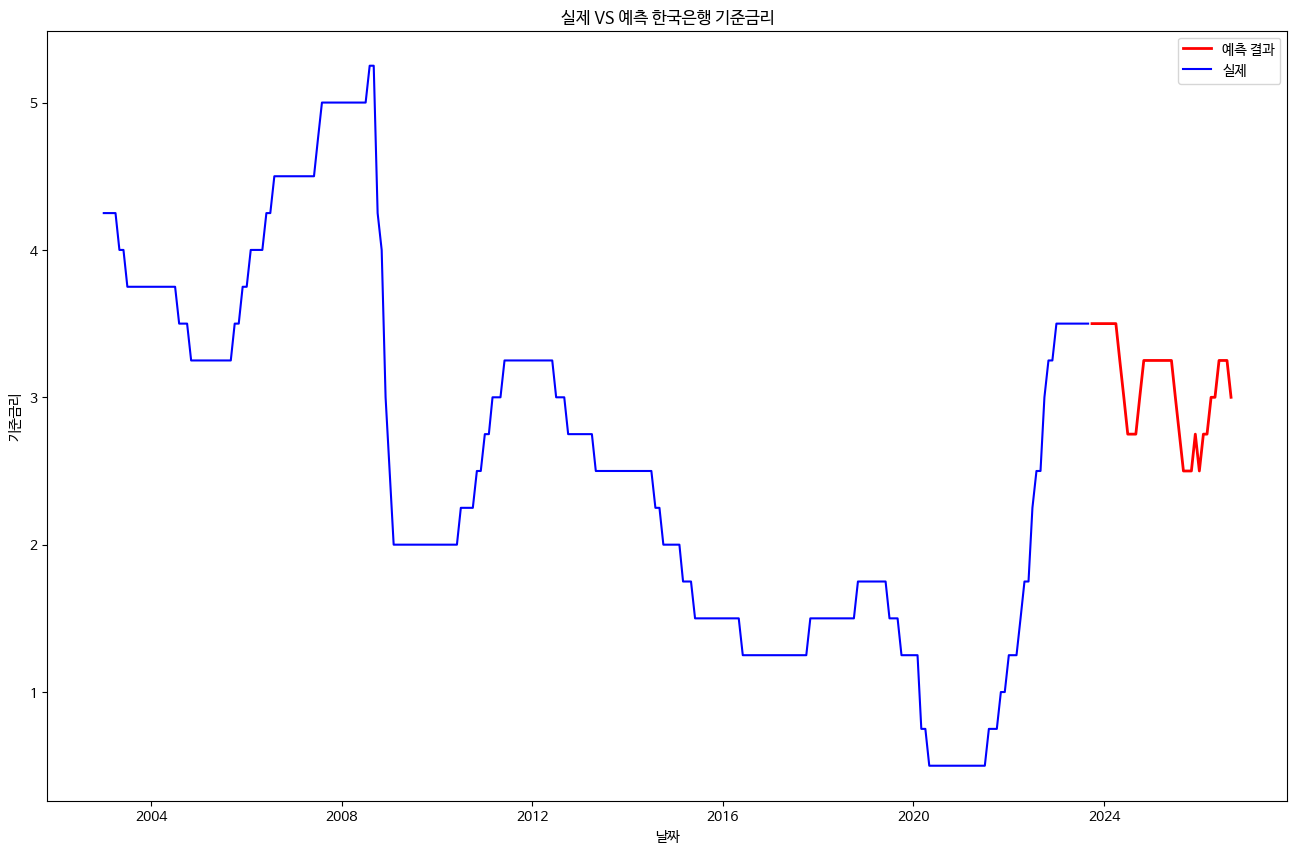

In [ ]:
for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])
for_plot_pred['날짜'] = pd.to_datetime(for_plot_pred['날짜'])

plt.figure(figsize=(16, 10))

plt.plot(for_plot_pred['날짜'], for_plot_pred['기준금리'], label='예측 결과', c = 'r',  linewidth=2)
plt.plot(for_plot['날짜'], for_plot['기준금리'], label='실제', c = 'b')

plt.title('실제 VS 예측 한국은행 기준금리')

plt.xlabel('날짜')

plt.ylabel('기준금리')

plt.legend()

plt.show()

### 2-2.5 이동평균 (Rolling)

In [ ]:
window_size = 2
ag_result_df['mean_0.25_roll'] = ag_result_df['mean_total'].rolling(window=window_size).mean()

In [ ]:
reference_values = np.arange(0, 10, 0.25)
ag_result_df['mean_0.25_roll'] = ag_result_df['mean_0.25'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x)))

ag_result_df['mean_0.25_roll']

0     3.50
1     3.50
2     3.50
3     3.50
4     3.50
5     3.50
6     3.50
7     3.25
8     3.00
9     2.75
10    2.75
11    2.75
12    3.00
13    3.25
14    3.25
15    3.25
16    3.25
17    3.25
18    3.25
19    3.25
20    3.25
21    3.00
22    2.50
23    2.50
24    2.50
25    2.50
26    2.75
27    2.50
28    2.75
29    2.75
30    3.00
31    3.00
32    3.25
33    3.25
34    3.25
35    3.00
Name: mean_0.25_roll, dtype: float64

<ipython-input-28-6ab53ad44876>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])


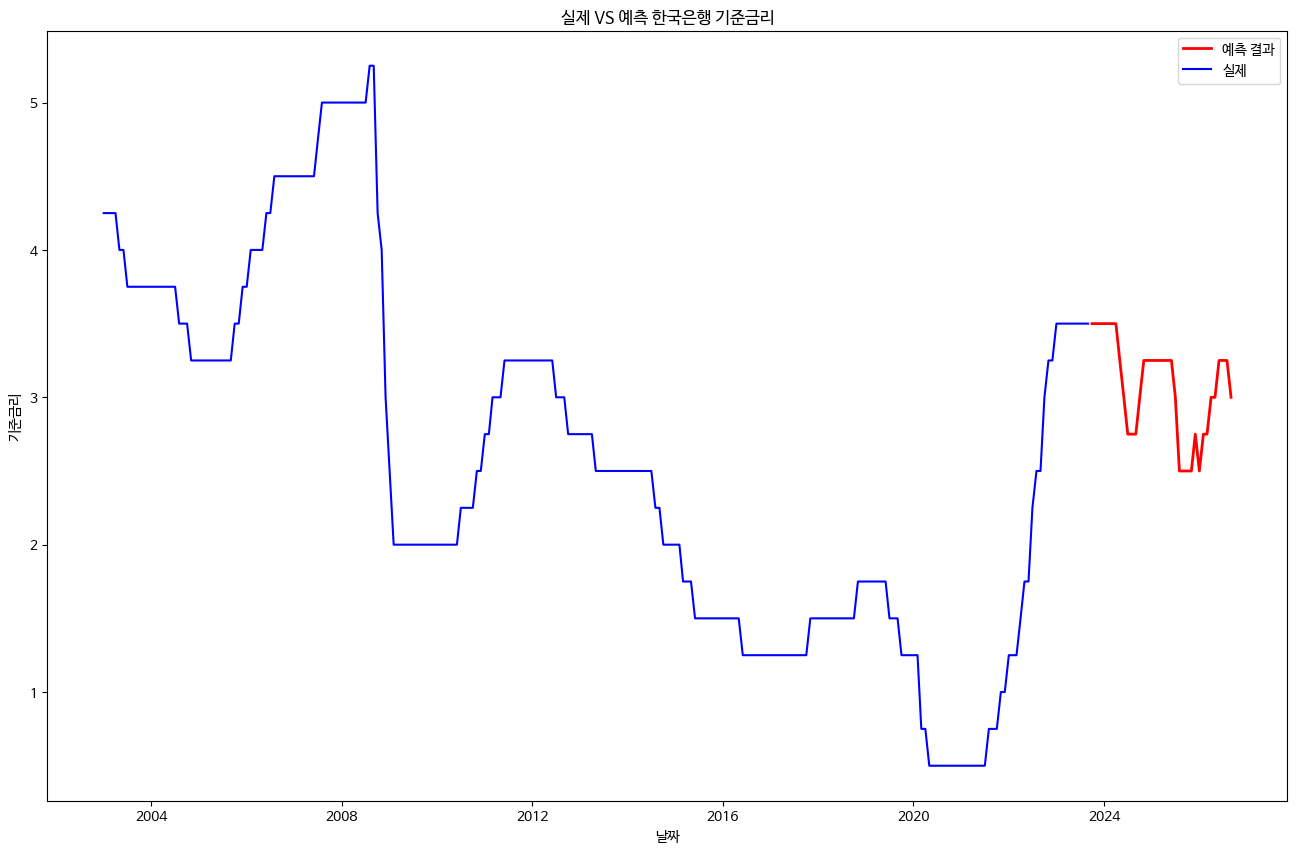

In [ ]:
for_plot = eco_df[['날짜', '기준금리']]
for_plot_pred = ag_result_df[['날짜','mean_0.25_roll']].rename(columns = {'mean_0.25_roll':'기준금리'})

for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])
for_plot_pred['날짜'] = pd.to_datetime(for_plot_pred['날짜'])

plt.figure(figsize=(16, 10))

plt.plot(for_plot_pred['날짜'], for_plot_pred['기준금리'], label='예측 결과', c = 'r',  linewidth=2)
plt.plot(for_plot['날짜'], for_plot['기준금리'], label='실제', c = 'b')

plt.title('실제 VS 예측 한국은행 기준금리')

plt.xlabel('날짜')

plt.ylabel('기준금리')

plt.legend()

plt.show()

# [3] LSTM 결과 확인

## 3-1. Validation

In [ ]:
lstm_valid_result_df

,날짜,기준금리,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3
0,2020-10-01,0.50,0.304306,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11-01,0.50,0.345950,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-01,0.50,0.328937,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-01,0.50,0.343333,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01,0.50,0.315895,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-03-01,0.50,0.361809,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-04-01,0.50,0.397771,0.791623,NaN,NaN,NaN,NaN,NaN
7,2021-05-01,0.50,0.422860,0.874392,NaN,NaN,NaN,NaN,NaN
8,2021-06-01,0.50,0.465600,0.927518,NaN,NaN,NaN,NaN,NaN
9,2021-07-01,0.50,0.444352,0.860156,NaN,NaN,NaN,NaN,NaN


### 3-1.1 Validation 확인 - 36개월

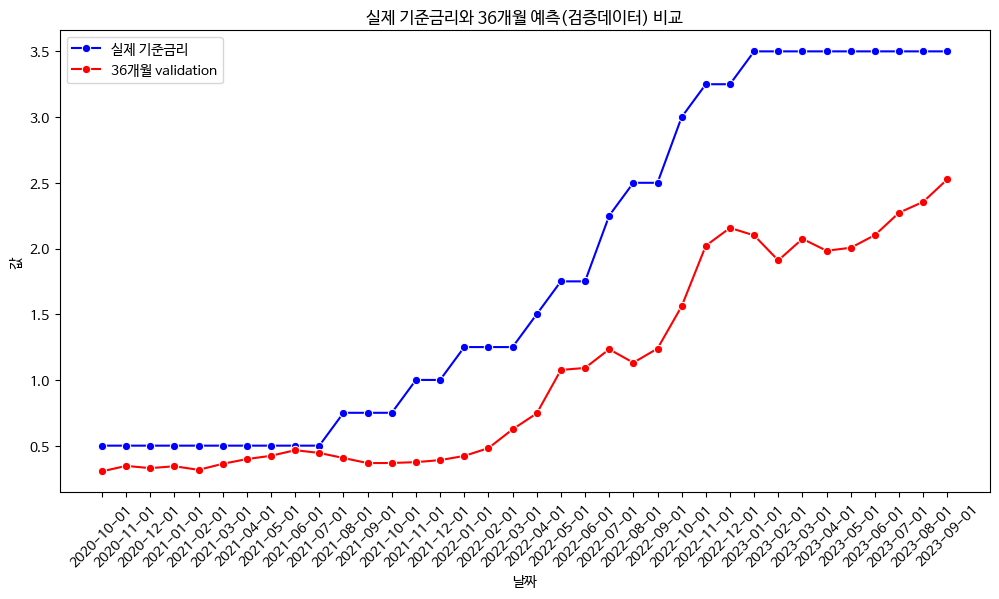

In [ ]:
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 라인 그래프 그리기
sns.lineplot(x='날짜', y='기준금리', data=lstm_valid_result_df, label='실제 기준금리', marker='o', c = 'b')
sns.lineplot(x='날짜', y='mean_36', data=lstm_valid_result_df, label='36개월 validation', marker='o', c = 'r')

plt.title('실제 기준금리와 36개월 예측(검증데이터) 비교')
plt.xlabel('날짜')
plt.ylabel('값')
plt.xticks(rotation=45)  # x축 라벨을 45도 기울임 (선택 사항)
plt.legend()  # 범례 표시

plt.show()

In [28]:
round(sum(abs(lstm_valid_result_df['기준금리'] - lstm_valid_result_df['mean_36'])) / 36, 2)

0.76

### 3-1.2 Validation 확인 - 30개월

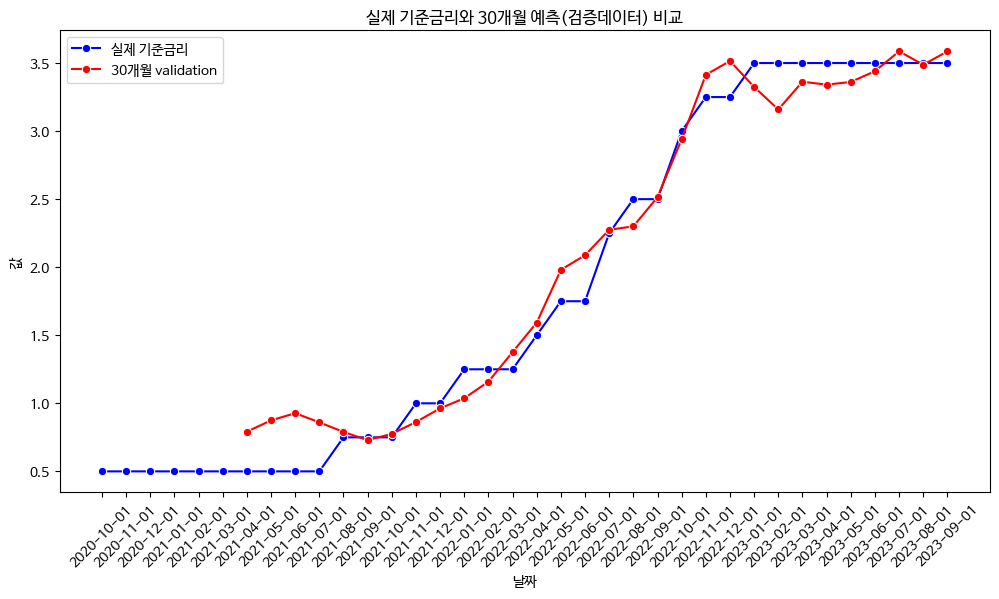

In [ ]:
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 라인 그래프 그리기
sns.lineplot(x='날짜', y='기준금리', data=lstm_valid_result_df, label='실제 기준금리', marker='o', c = 'b')
sns.lineplot(x='날짜', y='mean_30', data=lstm_valid_result_df, label='30개월 validation', marker='o', c = 'r')

plt.title('실제 기준금리와 30개월 예측(검증데이터) 비교')
plt.xlabel('날짜')
plt.ylabel('값')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [26]:
round(sum(abs(lstm_valid_result_df.iloc[6:,:]['기준금리'] - lstm_valid_result_df.iloc[6:,:]['mean_30'])) / 30, 2)

0.16

### 3-1.3 Validation 확인 - 24개월

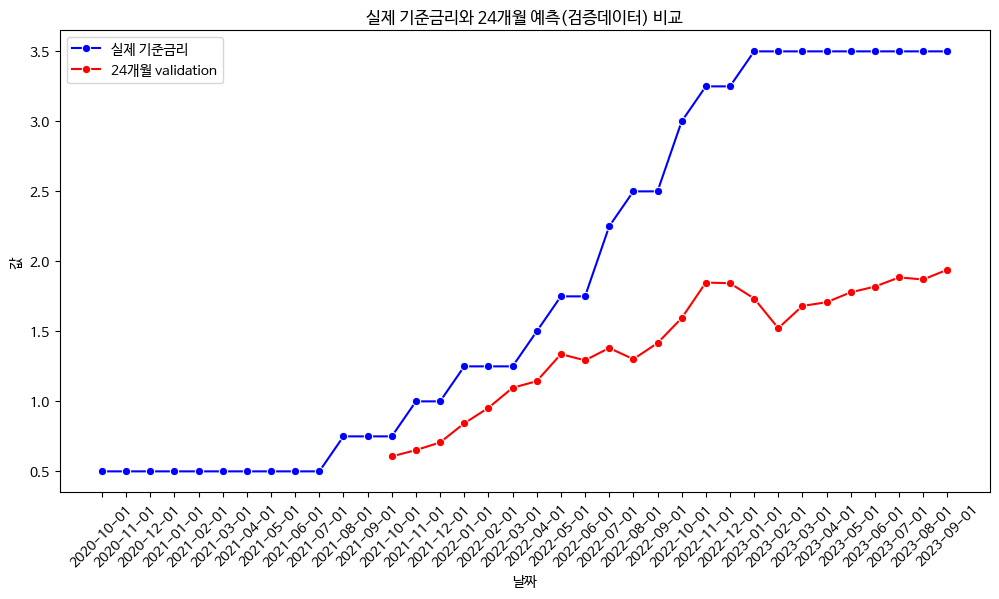

In [ ]:
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 라인 그래프 그리기
sns.lineplot(x='날짜', y='기준금리', data=lstm_valid_result_df, label='실제 기준금리', marker='o', c = 'b')
sns.lineplot(x='날짜', y='mean_24', data=lstm_valid_result_df, label='24개월 validation', marker='o', c = 'r')

plt.title('실제 기준금리와 24개월 예측(검증데이터) 비교')
plt.xlabel('날짜')
plt.ylabel('값')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [24]:
round(sum(abs(lstm_valid_result_df.iloc[12:,:]['기준금리'] - lstm_valid_result_df.iloc[12:,:]['mean_24'])) / 24, 2)

1.07

### 3-1.4 Validation 확인 - 18개월

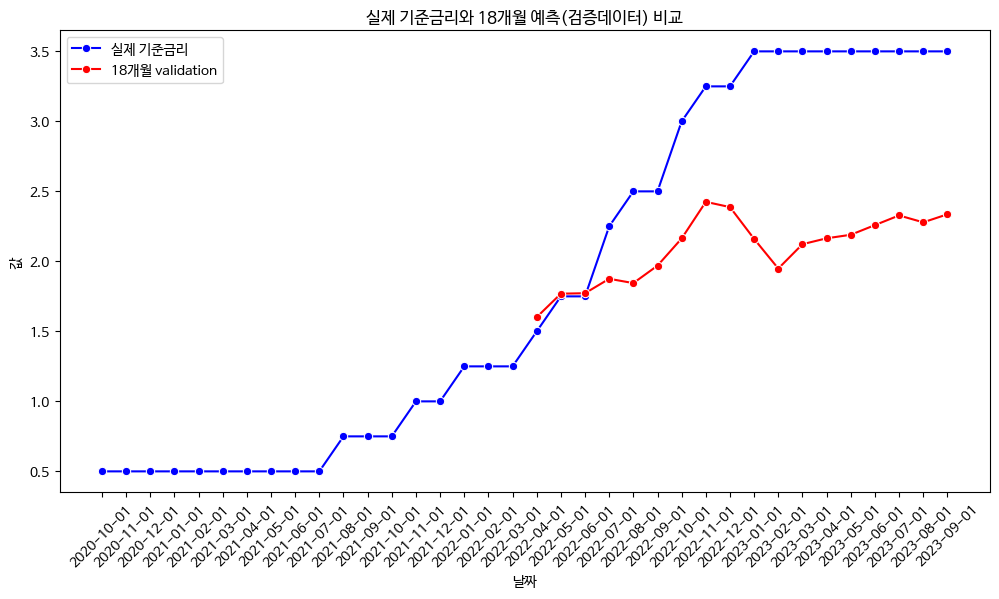

In [ ]:
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 라인 그래프 그리기
sns.lineplot(x='날짜', y='기준금리', data=lstm_valid_result_df, label='실제 기준금리', marker='o', c = 'b')
sns.lineplot(x='날짜', y='mean_18', data=lstm_valid_result_df, label='18개월 validation', marker='o', c = 'r')

plt.title('실제 기준금리와 18개월 예측(검증데이터) 비교')
plt.xlabel('날짜')
plt.ylabel('값')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [23]:
round(sum(abs(lstm_valid_result_df.iloc[18:,:]['기준금리'] - lstm_valid_result_df.iloc[18:,:]['mean_18'])) / 18, 2)

0.89

### 3-1.5 Validation 확인 - 12개월

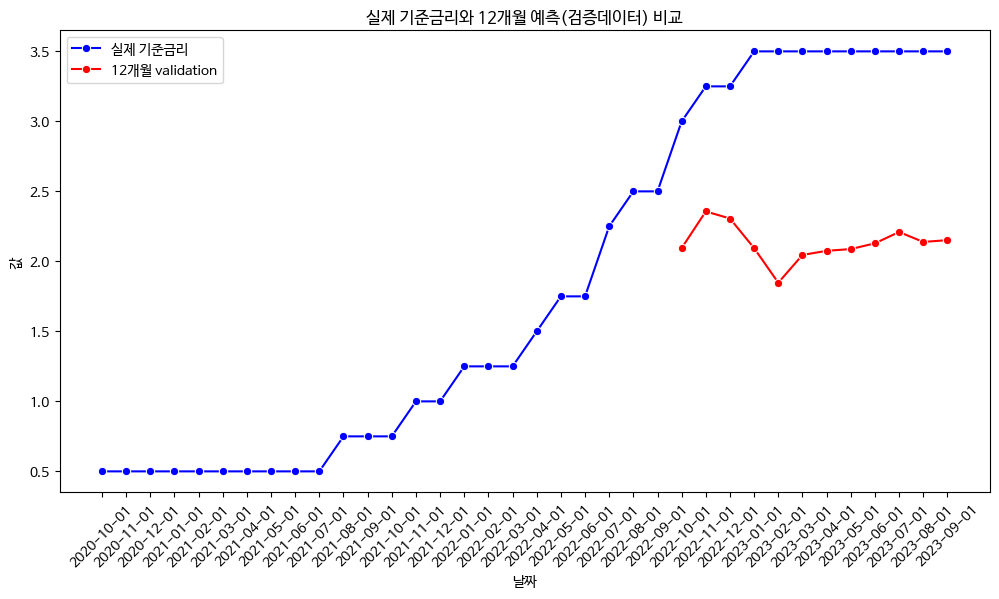

In [ ]:
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 라인 그래프 그리기
sns.lineplot(x='날짜', y='기준금리', data=lstm_valid_result_df, label='실제 기준금리', marker='o', c = 'b')
sns.lineplot(x='날짜', y='mean_12', data=lstm_valid_result_df, label='12개월 validation', marker='o', c = 'r')

plt.title('실제 기준금리와 12개월 예측(검증데이터) 비교')
plt.xlabel('날짜')
plt.ylabel('값')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [22]:
round(sum(abs(lstm_valid_result_df.iloc[24:,:]['기준금리'] - lstm_valid_result_df.iloc[24:,:]['mean_12'])) / 12, 2)

1.29

### 3-1.6 Validation 확인 - 6개월

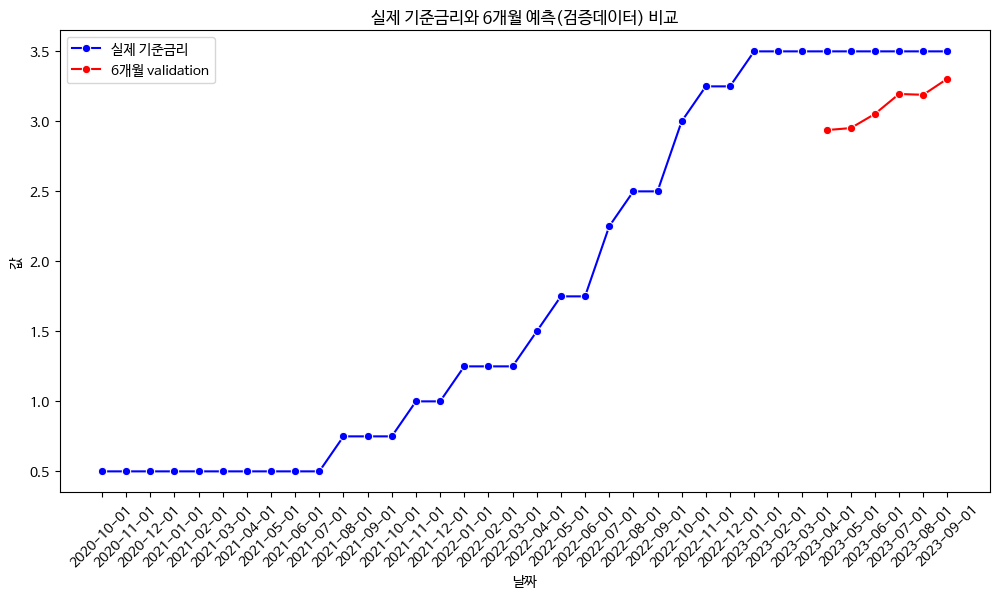

In [ ]:
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 라인 그래프 그리기
sns.lineplot(x='날짜', y='기준금리', data=lstm_valid_result_df, label='실제 기준금리', marker='o', c = 'b')
sns.lineplot(x='날짜', y='mean_6', data=lstm_valid_result_df, label='6개월 validation', marker='o', c = 'r')

plt.title('실제 기준금리와 6개월 예측(검증데이터) 비교')
plt.xlabel('날짜')
plt.ylabel('값')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [21]:
round(sum(abs(lstm_valid_result_df.iloc[30:,:]['기준금리'] - lstm_valid_result_df.iloc[30:,:]['mean_6'])) / 6, 2)

0.39

### 3-1.7 Validation 확인 - 3개월

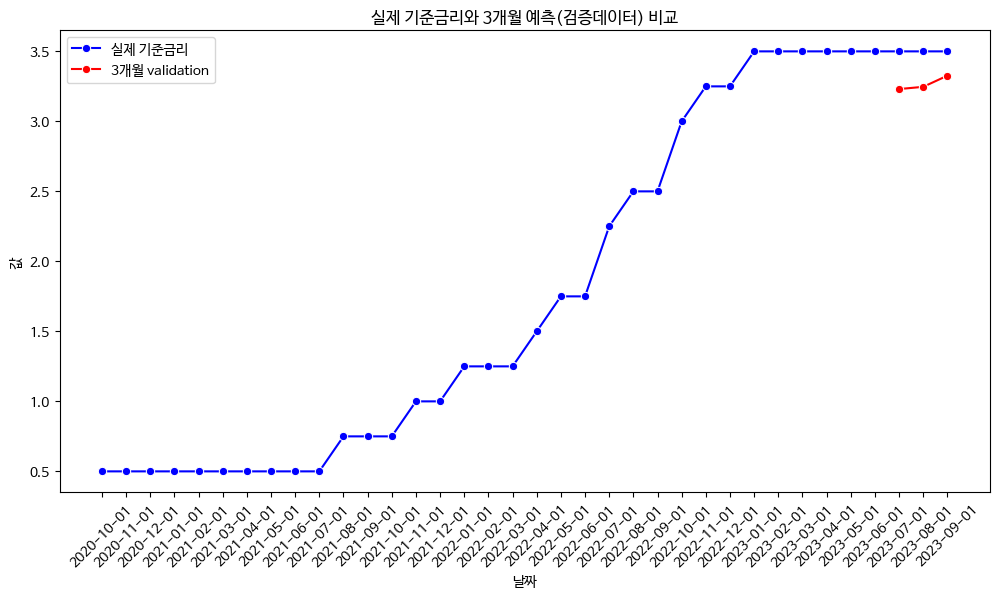

In [ ]:
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 라인 그래프 그리기
sns.lineplot(x='날짜', y='기준금리', data=lstm_valid_result_df, label='실제 기준금리', marker='o', c = 'b')
sns.lineplot(x='날짜', y='mean_3', data=lstm_valid_result_df, label='3개월 validation', marker='o', c = 'r')

plt.title('실제 기준금리와 3개월 예측(검증데이터) 비교')
plt.xlabel('날짜')
plt.ylabel('값')
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [20]:
round(sum(abs(lstm_valid_result_df.iloc[33:,:]['기준금리'] - lstm_valid_result_df.iloc[33:,:]['mean_3'])) / 3, 2)

0.23

## 3-2. Prediction

In [ ]:
lstm_result_df['mean_total'] = lstm_result_df[['mean_36', 'mean_30', 'mean_24', 'mean_18', 'mean_12', 'mean_6', 'mean_3']].mean(axis=1, skipna=True)
lstm_result_df

,날짜,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3,mean_total
0,2023-10-01,3.555016,3.584866,3.813241,3.279956,3.061081,3.440488,3.534209,3.466980
1,2023-11-01,3.462728,3.477676,3.698823,3.172054,2.971613,3.356622,3.457581,3.371014
2,2023-12-01,3.511607,3.544749,3.758659,3.197117,2.982465,3.397085,3.506380,3.414009
3,2024-01-01,3.387103,3.354097,3.575998,3.058905,2.877938,3.275386,NaN,3.254905
4,2024-02-01,3.475201,3.468486,3.677234,3.164629,2.950721,3.355893,NaN,3.348694
5,2024-03-01,3.421181,3.400823,3.620551,3.118737,2.920817,3.310730,NaN,3.298807
6,2024-04-01,3.473947,3.475055,3.689832,3.183603,2.970076,NaN,NaN,3.358503
7,2024-05-01,3.467967,3.452940,3.672691,3.176381,2.968134,NaN,NaN,3.347622
8,2024-06-01,3.494763,3.486350,3.697367,3.203686,2.980298,NaN,NaN,3.372493
9,2024-07-01,3.483303,3.461595,3.677229,3.185937,2.967219,NaN,NaN,3.355056


In [ ]:
# threshold = 0.25
# ag_result_df['mean_0.25'] = ag_result_df['mean_total'].where((ag_result_df['mean_total'].diff().abs() >= threshold), ag_result_df['mean_total'].shift())
# ag_result_df.at[0, 'mean_0.25'] = ag_result_df.at[0, 'mean_total']
# ag_result_df

### 3-2.1 예측 결과 시각화

In [ ]:
for_plot = eco_df[['날짜', '기준금리']]
for_plot_pred = lstm_result_df[['날짜','mean_total']].rename(columns = {'mean_total':'기준금리'})

<ipython-input-40-fca2e9b7c150>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])


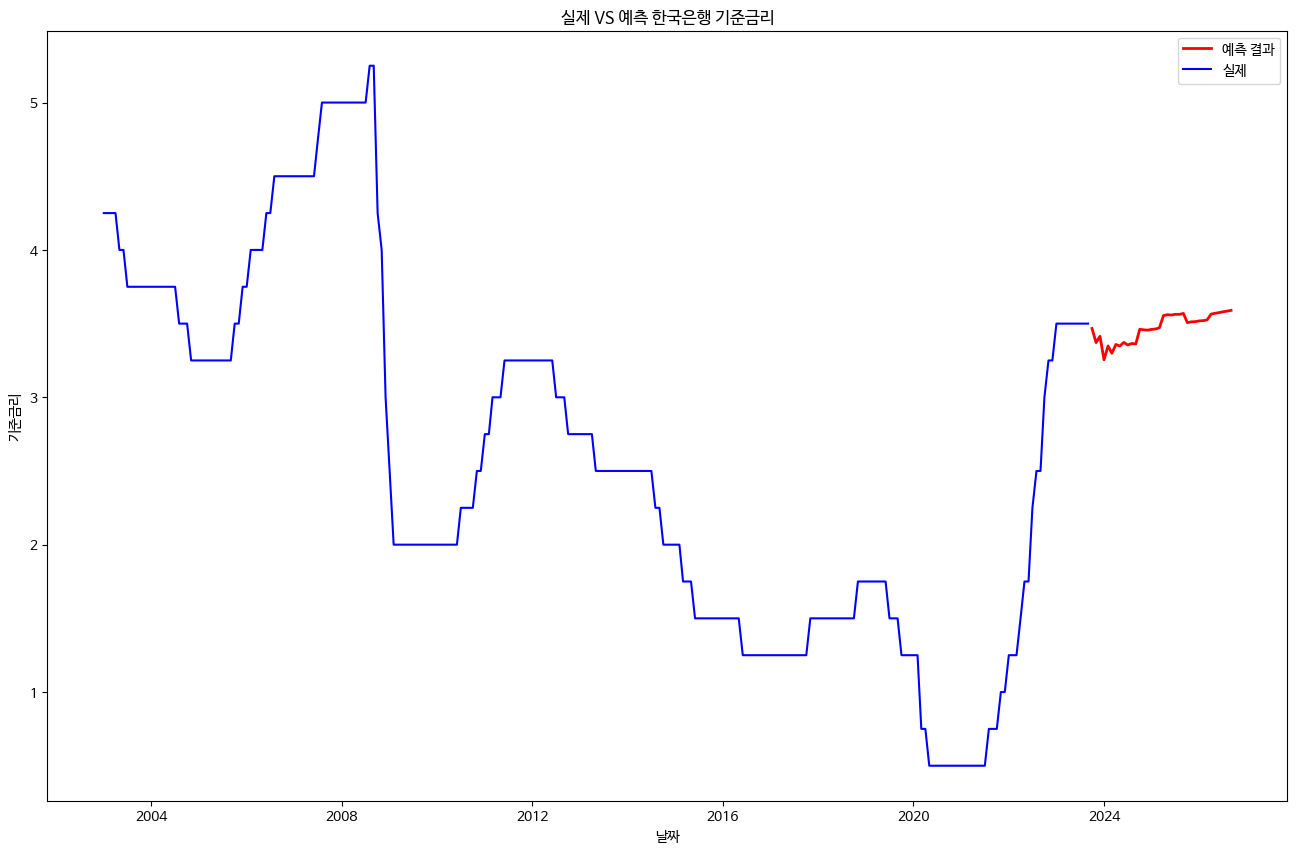

In [ ]:
for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])
for_plot_pred['날짜'] = pd.to_datetime(for_plot_pred['날짜'])

plt.figure(figsize=(16, 10))

plt.plot(for_plot_pred['날짜'], for_plot_pred['기준금리'], label='예측 결과', c = 'r',  linewidth=2)
plt.plot(for_plot['날짜'], for_plot['기준금리'], label='실제', c = 'b')

plt.title('실제 VS 예측 한국은행 기준금리')

plt.xlabel('날짜')

plt.ylabel('기준금리')

plt.legend()

plt.show()

### 3-2.2 0.25 Thresh hold

In [ ]:
threshold = 0.25
lstm_result_df['mean_0.25'] = lstm_result_df['mean_total'].where((lstm_result_df['mean_total'].diff().abs() >= threshold), lstm_result_df['mean_total'].shift())
lstm_result_df.at[0, 'mean_0.25'] = lstm_result_df.at[0, 'mean_total']
lstm_result_df

,날짜,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3,mean_total,mean_0.25
0,2023-10-01,3.555016,3.584866,3.813241,3.279956,3.061081,3.440488,3.534209,3.466980,3.466980
1,2023-11-01,3.462728,3.477676,3.698823,3.172054,2.971613,3.356622,3.457581,3.371014,3.466980
2,2023-12-01,3.511607,3.544749,3.758659,3.197117,2.982465,3.397085,3.506380,3.414009,3.371014
3,2024-01-01,3.387103,3.354097,3.575998,3.058905,2.877938,3.275386,NaN,3.254905,3.414009
4,2024-02-01,3.475201,3.468486,3.677234,3.164629,2.950721,3.355893,NaN,3.348694,3.254905
5,2024-03-01,3.421181,3.400823,3.620551,3.118737,2.920817,3.310730,NaN,3.298807,3.348694
6,2024-04-01,3.473947,3.475055,3.689832,3.183603,2.970076,NaN,NaN,3.358503,3.298807
7,2024-05-01,3.467967,3.452940,3.672691,3.176381,2.968134,NaN,NaN,3.347622,3.358503
8,2024-06-01,3.494763,3.486350,3.697367,3.203686,2.980298,NaN,NaN,3.372493,3.347622
9,2024-07-01,3.483303,3.461595,3.677229,3.185937,2.967219,NaN,NaN,3.355056,3.372493


In [ ]:
for_plot = eco_df[['날짜', '기준금리']]
for_plot_pred = lstm_result_df[['날짜','mean_0.25']].rename(columns = {'mean_0.25':'기준금리'})

In [ ]:
for i in range(1, len(lstm_result_df)):
    diff = lstm_result_df.loc[i, 'mean_0.25'] - lstm_result_df.loc[i-1, 'mean_0.25']

    # 조건 1: 값이 0.5 이상 작아졌을 때, 0.25만큼만 하락된 값이 반영되도록 스무딩
    if diff <= -0.5:
        lstm_result_df.loc[i, 'mean_0.25'] = lstm_result_df.loc[i-1, 'mean_0.25'] - 0.25

    # 조건 2: 값이 0.5 이상 커졌을 , 0.25만큼만 상승된 값이 반영되도록 스무딩
    elif diff >= 0.5:
        lstm_result_df.loc[i, 'mean_0.25'] = lstm_result_df.loc[i-1, 'mean_0.25'] + 0.25

<ipython-input-44-fca2e9b7c150>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])


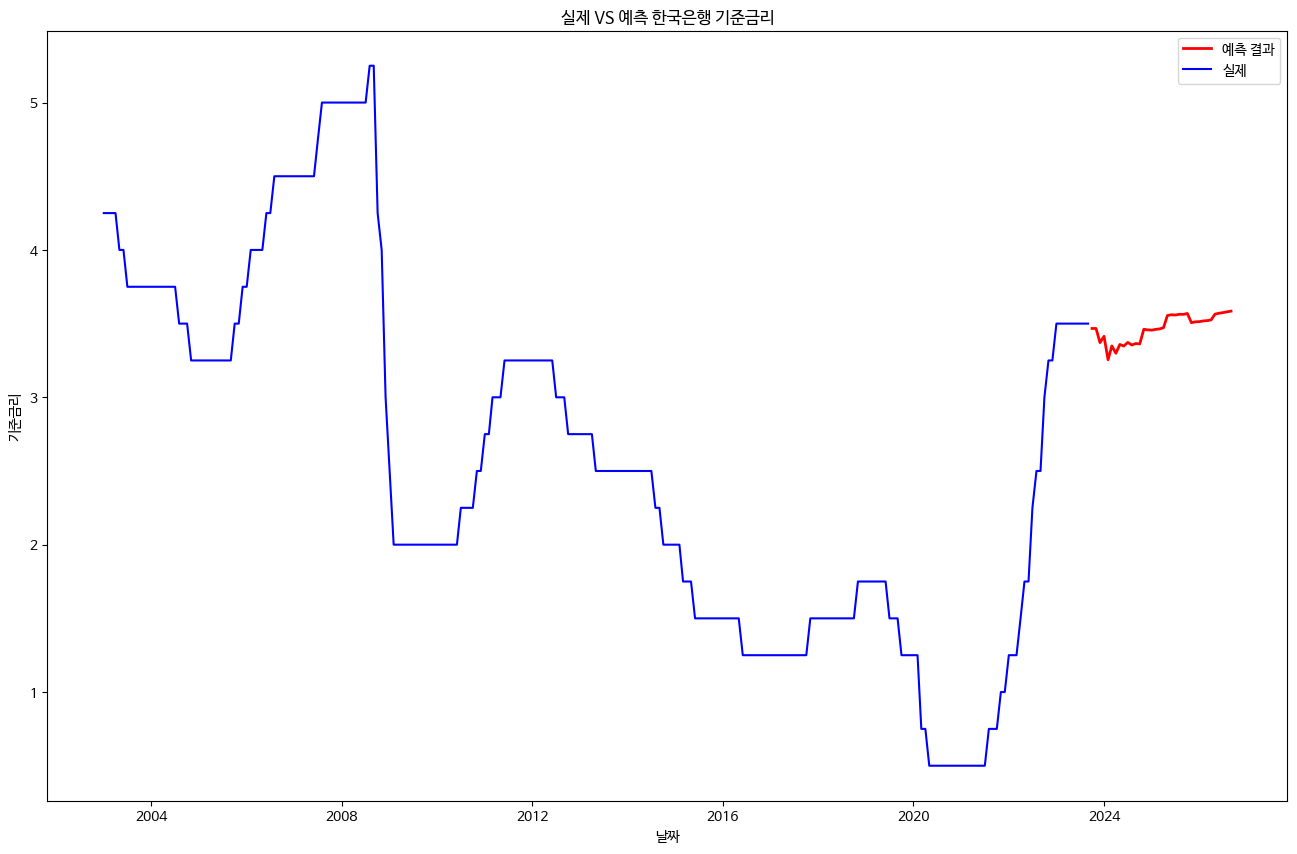

In [ ]:
for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])
for_plot_pred['날짜'] = pd.to_datetime(for_plot_pred['날짜'])

plt.figure(figsize=(16, 10))

plt.plot(for_plot_pred['날짜'], for_plot_pred['기준금리'], label='예측 결과', c = 'r',  linewidth=2)
plt.plot(for_plot['날짜'], for_plot['기준금리'], label='실제', c = 'b')

plt.title('실제 VS 예측 한국은행 기준금리')

plt.xlabel('날짜')

plt.ylabel('기준금리')

plt.legend()

plt.show()

### 3-2.3 mean_total 기준 0.25로 스무딩

In [ ]:
reference_values = np.arange(0, 5, 0.25)

lstm_result_df['mean_total_0.25_cut'] = lstm_result_df['mean_total'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x)))

lstm_result_df

,날짜,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3,mean_total,mean_0.25,mean_total_0.25_cut
0,2023-10-01,3.555016,3.584866,3.813241,3.279956,3.061081,3.440488,3.534209,3.466980,3.466980,3.50
1,2023-11-01,3.462728,3.477676,3.698823,3.172054,2.971613,3.356622,3.457581,3.371014,3.466980,3.25
2,2023-12-01,3.511607,3.544749,3.758659,3.197117,2.982465,3.397085,3.506380,3.414009,3.371014,3.50
3,2024-01-01,3.387103,3.354097,3.575998,3.058905,2.877938,3.275386,NaN,3.254905,3.414009,3.25
4,2024-02-01,3.475201,3.468486,3.677234,3.164629,2.950721,3.355893,NaN,3.348694,3.254905,3.25
5,2024-03-01,3.421181,3.400823,3.620551,3.118737,2.920817,3.310730,NaN,3.298807,3.348694,3.25
6,2024-04-01,3.473947,3.475055,3.689832,3.183603,2.970076,NaN,NaN,3.358503,3.298807,3.25
7,2024-05-01,3.467967,3.452940,3.672691,3.176381,2.968134,NaN,NaN,3.347622,3.358503,3.25
8,2024-06-01,3.494763,3.486350,3.697367,3.203686,2.980298,NaN,NaN,3.372493,3.347622,3.25
9,2024-07-01,3.483303,3.461595,3.677229,3.185937,2.967219,NaN,NaN,3.355056,3.372493,3.25


In [ ]:
for_plot = eco_df[['날짜', '기준금리']]
for_plot_pred = lstm_result_df[['날짜','mean_total_0.25_cut']].rename(columns = {'mean_total_0.25_cut':'기준금리'})

<ipython-input-47-fca2e9b7c150>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])


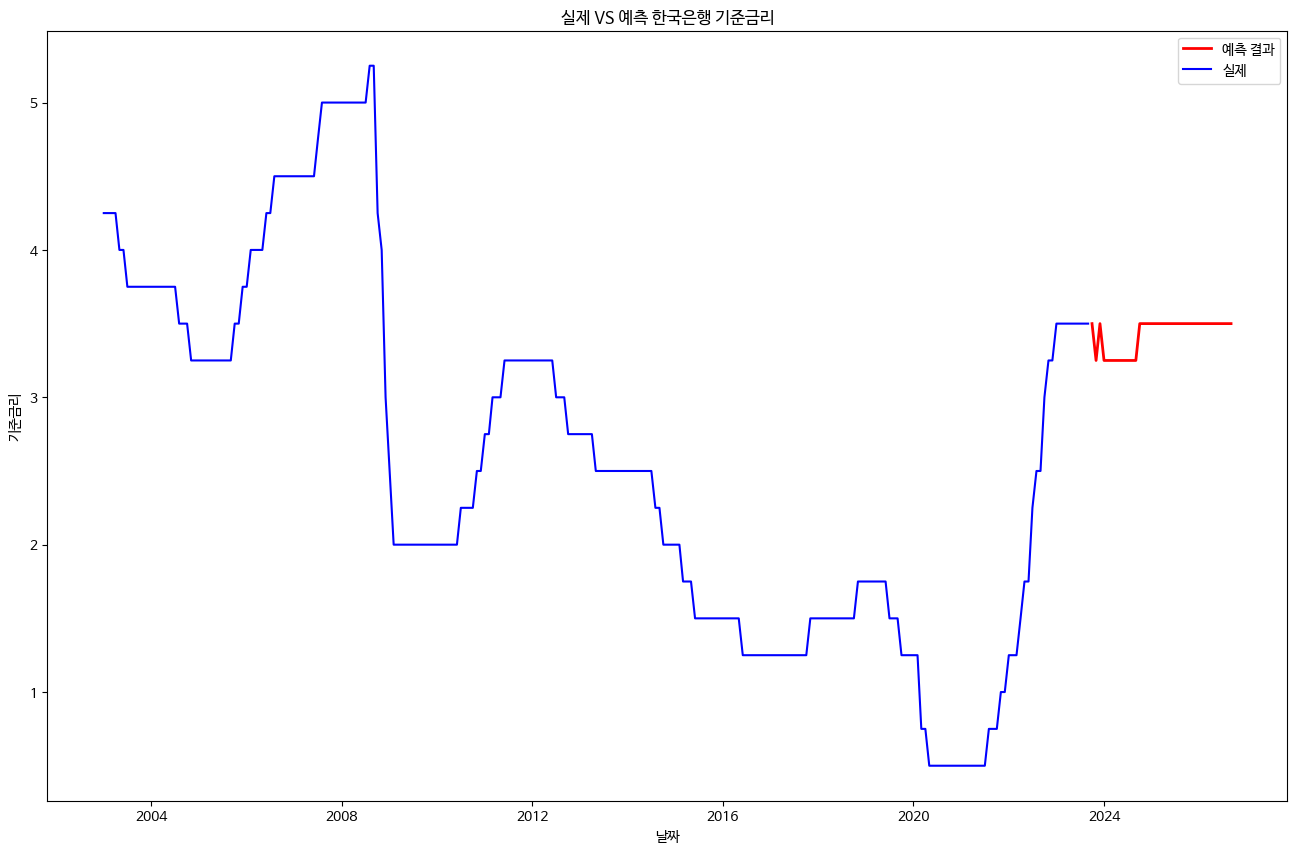

In [ ]:
for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])
for_plot_pred['날짜'] = pd.to_datetime(for_plot_pred['날짜'])

plt.figure(figsize=(16, 10))

plt.plot(for_plot_pred['날짜'], for_plot_pred['기준금리'], label='예측 결과', c = 'r',  linewidth=2)
plt.plot(for_plot['날짜'], for_plot['기준금리'], label='실제', c = 'b')

plt.title('실제 VS 예측 한국은행 기준금리')

plt.xlabel('날짜')

plt.ylabel('기준금리')

plt.legend()

plt.show()

### 3-2.4 0.25 % 단위로 스케일링

In [ ]:
reference_values = np.arange(0, 5, 0.25)
lstm_result_df['mean_0.25_cut'] = lstm_result_df['mean_0.25'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x)))

lstm_result_df['mean_0.25_cut']

0     3.50
1     3.50
2     3.25
3     3.50
4     3.25
5     3.25
6     3.25
7     3.25
8     3.25
9     3.25
10    3.25
11    3.25
12    3.25
13    3.50
14    3.50
15    3.50
16    3.50
17    3.50
18    3.50
19    3.50
20    3.50
21    3.50
22    3.50
23    3.50
24    3.50
25    3.50
26    3.50
27    3.50
28    3.50
29    3.50
30    3.50
31    3.50
32    3.50
33    3.50
34    3.50
35    3.50
Name: mean_0.25_cut, dtype: float64

- 추가로 한번에 0.5 이상의 움직임을 보이는 경우, 바로 이전 값에서 0.25 변한 값으로 반환한다.

In [ ]:
for i in range(1, len(lstm_result_df)):
    diff = lstm_result_df.loc[i, 'mean_0.25_cut'] - lstm_result_df.loc[i-1, 'mean_0.25_cut']

    # 조건 1: 값이 0.5 이상 작아졌을 때, 0.25만큼만 하락된 값이 반영되도록 스무딩
    if diff <= -0.5:
        lstm_result_df.loc[i, 'mean_0.25_cut'] = lstm_result_df.loc[i-1, 'mean_0.25_cut'] - 0.25

    # 조건 2: 값이 0.5 이상 커졌을 , 0.25만큼만 상승된 값이 반영되도록 스무딩
    elif diff >= 0.5:
        lstm_result_df.loc[i, 'mean_0.25_cut'] = lstm_result_df.loc[i-1, 'mean_0.25_cut'] + 0.25

In [ ]:
for_plot = eco_df[['날짜', '기준금리']]
for_plot_pred = lstm_result_df[['날짜','mean_0.25_cut']].rename(columns = {'mean_0.25_cut':'기준금리'})

<ipython-input-51-fca2e9b7c150>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])


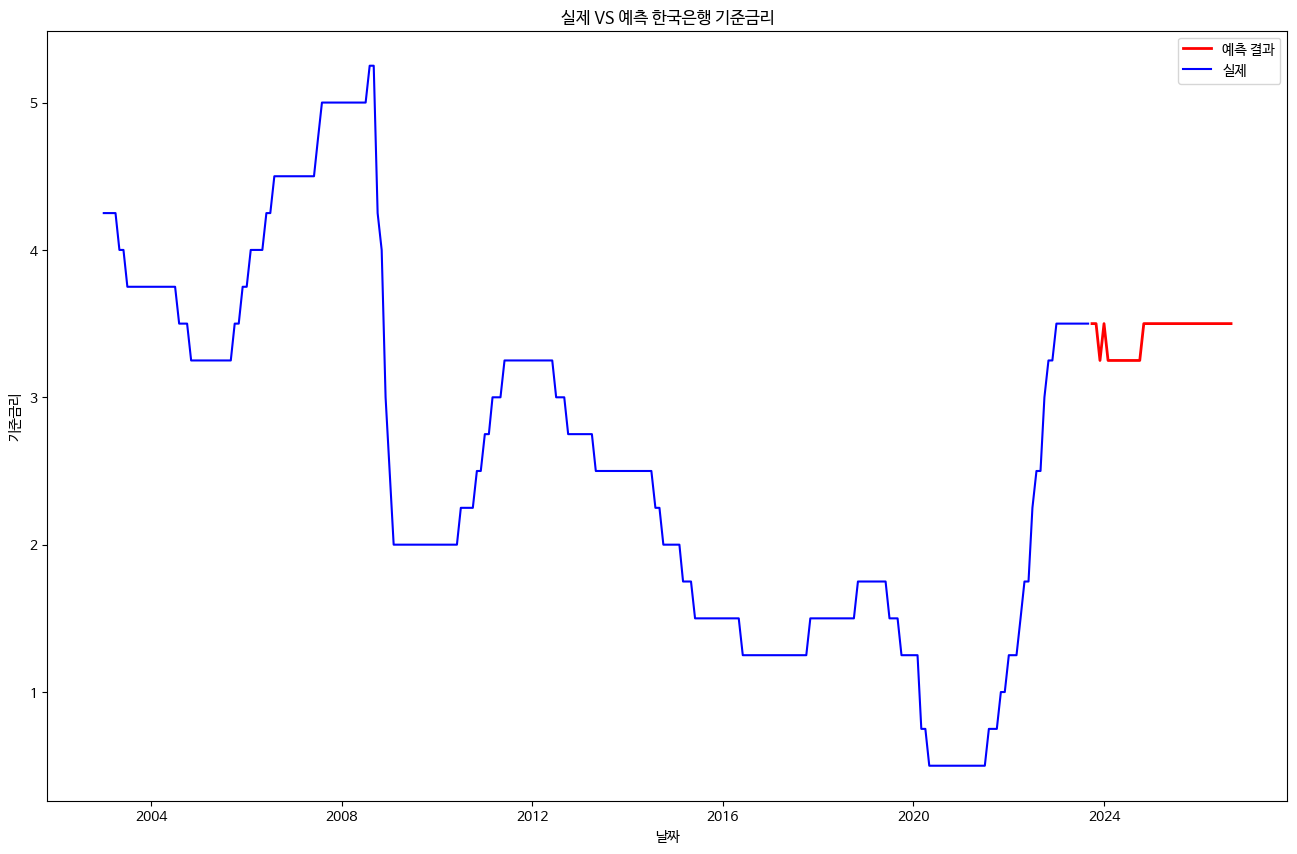

In [ ]:
for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])
for_plot_pred['날짜'] = pd.to_datetime(for_plot_pred['날짜'])

plt.figure(figsize=(16, 10))

plt.plot(for_plot_pred['날짜'], for_plot_pred['기준금리'], label='예측 결과', c = 'r',  linewidth=2)
plt.plot(for_plot['날짜'], for_plot['기준금리'], label='실제', c = 'b')

plt.title('실제 VS 예측 한국은행 기준금리')

plt.xlabel('날짜')

plt.ylabel('기준금리')

plt.legend()

plt.show()

### 3-2.5 이동평균 (Rolling)

In [ ]:
window_size = 3
lstm_result_df['mean_0.25_roll'] = lstm_result_df['mean_total'].rolling(window=window_size).mean()

In [ ]:
reference_values = np.arange(0, 10, 0.25)
lstm_result_df['mean_0.25_roll'] = lstm_result_df['mean_0.25'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x)))

lstm_result_df['mean_0.25_roll']

0     3.50
1     3.50
2     3.25
3     3.50
4     3.25
5     3.25
6     3.25
7     3.25
8     3.25
9     3.25
10    3.25
11    3.25
12    3.25
13    3.50
14    3.50
15    3.50
16    3.50
17    3.50
18    3.50
19    3.50
20    3.50
21    3.50
22    3.50
23    3.50
24    3.50
25    3.50
26    3.50
27    3.50
28    3.50
29    3.50
30    3.50
31    3.50
32    3.50
33    3.50
34    3.50
35    3.50
Name: mean_0.25_roll, dtype: float64

<ipython-input-54-891d3f8b21dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])


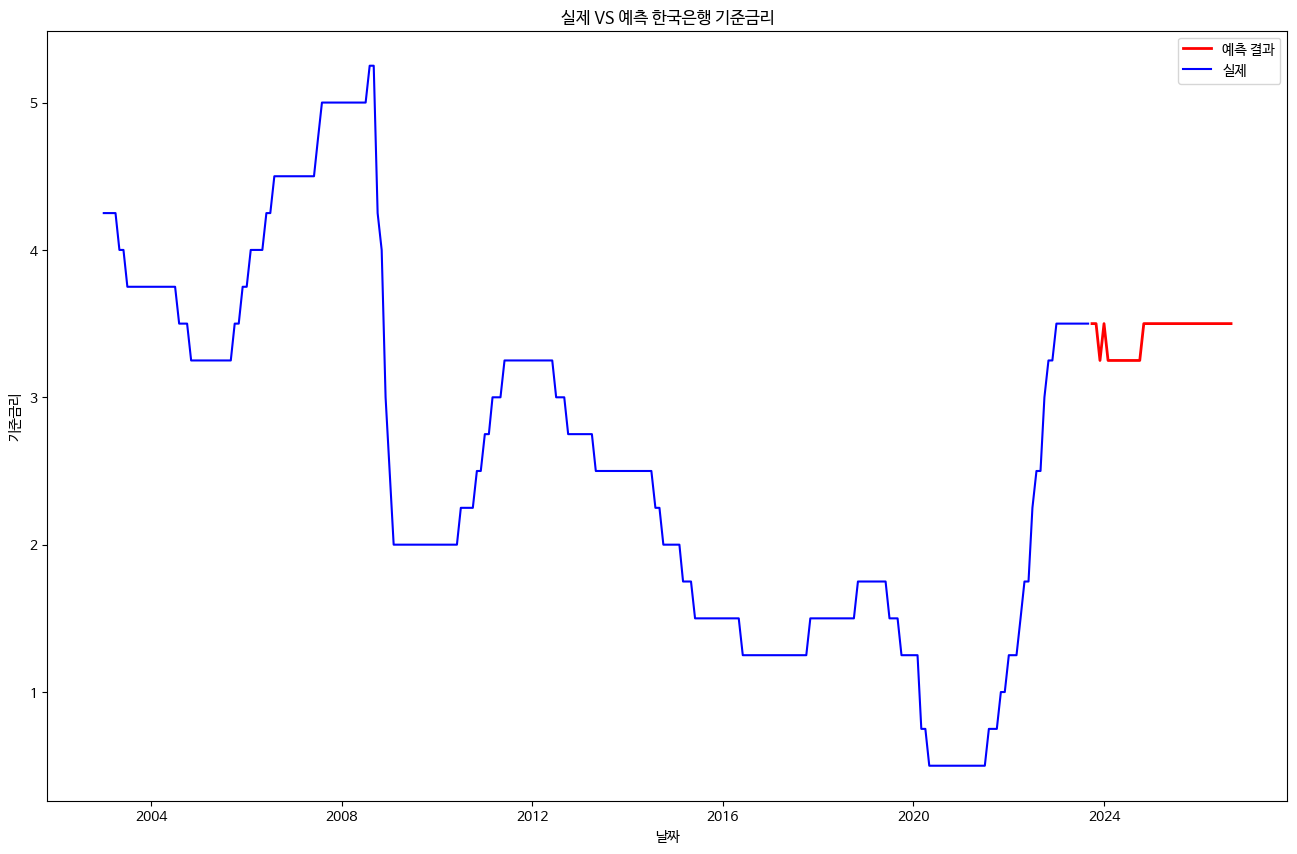

In [ ]:
for_plot = eco_df[['날짜', '기준금리']]
for_plot_pred = lstm_result_df[['날짜','mean_0.25_roll']].rename(columns = {'mean_0.25_roll':'기준금리'})

for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])
for_plot_pred['날짜'] = pd.to_datetime(for_plot_pred['날짜'])

plt.figure(figsize=(16, 10))

plt.plot(for_plot_pred['날짜'], for_plot_pred['기준금리'], label='예측 결과', c = 'r',  linewidth=2)
plt.plot(for_plot['날짜'], for_plot['기준금리'], label='실제', c = 'b')

plt.title('실제 VS 예측 한국은행 기준금리')

plt.xlabel('날짜')

plt.ylabel('기준금리')

plt.legend()

plt.show()

# [4] Check the Validation

In [ ]:
ag_valid_result_df

,Unnamed: 0.1,날짜,기준금리,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3
Unnamed: 0,,,,,,,,,,
0,0,2020-10-01,0.50,0.672221,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-11-01,0.50,0.750395,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-12-01,0.50,0.857892,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2021-01-01,0.50,0.960908,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2021-02-01,0.50,1.053804,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2021-03-01,0.50,1.137119,NaN,NaN,NaN,NaN,NaN,NaN
6,6,2021-04-01,0.50,1.212457,1.253351,NaN,NaN,NaN,NaN,NaN
7,7,2021-05-01,0.50,1.281339,1.212417,NaN,NaN,NaN,NaN,NaN
8,8,2021-06-01,0.50,1.344992,1.293960,NaN,NaN,NaN,NaN,NaN


In [ ]:
lstm_valid_result_df

,날짜,기준금리,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3
0,2020-10-01,0.50,0.304306,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11-01,0.50,0.345950,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-01,0.50,0.328937,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-01,0.50,0.343333,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01,0.50,0.315895,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-03-01,0.50,0.361809,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-04-01,0.50,0.397771,0.791623,NaN,NaN,NaN,NaN,NaN
7,2021-05-01,0.50,0.422860,0.874392,NaN,NaN,NaN,NaN,NaN
8,2021-06-01,0.50,0.465600,0.927518,NaN,NaN,NaN,NaN,NaN
9,2021-07-01,0.50,0.444352,0.860156,NaN,NaN,NaN,NaN,NaN


In [ ]:
total_valid = ag_valid_result_df[['날짜','기준금리']]

In [ ]:
# total_valid['mean_36'] = (ag_valid_result_df['mean_36']  + (lstm_valid_result_df['mean_36'] * 2)) /3
# total_valid['mean_30'] = (ag_valid_result_df['mean_30'] + (lstm_valid_result_df['mean_30'] * 2)) /3
# total_valid['mean_24'] = (ag_valid_result_df['mean_24'] + (lstm_valid_result_df['mean_24']* 2)) /3
# total_valid['mean_18'] = (ag_valid_result_df['mean_18'] + (lstm_valid_result_df['mean_18']* 2)) /3
# total_valid['mean_12'] = (ag_valid_result_df['mean_12'] + (lstm_valid_result_df['mean_12']* 2)) /3
# total_valid['mean_6'] = (ag_valid_result_df['mean_6'] + (lstm_valid_result_df['mean_6']* 2)) /3
# total_valid['mean_3'] =(ag_valid_result_df['mean_3'] + (lstm_valid_result_df['mean_3']* 2) ) /3

In [ ]:
total_valid['mean_36'] = (ag_valid_result_df['mean_36']  + (lstm_valid_result_df['mean_36'] )) /2
total_valid['mean_30'] = (ag_valid_result_df['mean_30'] + (lstm_valid_result_df['mean_30'] )) /2
total_valid['mean_24'] = (ag_valid_result_df['mean_24'] + (lstm_valid_result_df['mean_24'])) /2
total_valid['mean_18'] = (ag_valid_result_df['mean_18'] + (lstm_valid_result_df['mean_18'])) /2
total_valid['mean_12'] = (ag_valid_result_df['mean_12'] + (lstm_valid_result_df['mean_12'])) /2
total_valid['mean_6'] = (ag_valid_result_df['mean_6'] + (lstm_valid_result_df['mean_6'])) /2
total_valid['mean_3'] =(ag_valid_result_df['mean_3'] + (lstm_valid_result_df['mean_3']) ) /2

In [ ]:
total_valid

,날짜,기준금리,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3
Unnamed: 0,,,,,,,,,
0,2020-10-01,0.50,0.488264,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11-01,0.50,0.548173,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-01,0.50,0.593415,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-01,0.50,0.652121,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01,0.50,0.684850,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-03-01,0.50,0.749464,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-04-01,0.50,0.805114,1.022487,NaN,NaN,NaN,NaN,NaN
7,2021-05-01,0.50,0.852100,1.043404,NaN,NaN,NaN,NaN,NaN
8,2021-06-01,0.50,0.905296,1.110739,NaN,NaN,NaN,NaN,NaN


- 0.25 이상 차이가 나지 않는다면, 유지로 결정

In [ ]:
columns_to_check = ['mean_36', 'mean_30', 'mean_24', 'mean_18', 'mean_12', 'mean_6', 'mean_3']

for column in columns_to_check:
    if column in total_valid.columns:
        # 이전 값을 저장하는 임시 칼럼 생성
        total_valid['temp_prev'] = total_valid[column].shift(1)
        # 이전 값과의 차이가 0.25보다 작은 경우 이전 값으로 대체
        total_valid[column] = total_valid.apply(lambda row: row['temp_prev'] if abs(row[column] - row['temp_prev']) < 0.25 else row[column], axis=1)
        # 임시 칼럼 삭제
        total_valid.drop('temp_prev', axis=1, inplace=True)

- 0.25 단위로 스무딩

In [ ]:
round_values = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4]

# 각 값에 대해 가장 가까운 값으로 반올림
def custom_round_with_na(x, values):
    if pd.isna(x):
        return x
    return min(values, key=lambda v: abs(v - x))

columns_to_round = ['mean_36', 'mean_30','mean_24', 'mean_18', 'mean_12', 'mean_6', 'mean_3']

# 주어진 칼럼들에 대해서만 custom_round 함수를 적용
for column in columns_to_round:
    if column in total_valid.columns:
        total_valid[column] = total_valid[column].apply(lambda x: custom_round_with_na(x, round_values))

total_valid.head()

,날짜,기준금리,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3
Unnamed: 0,,,,,,,,,
0,2020-10-01,0.5,0.50,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11-01,0.5,0.50,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-01,0.5,0.50,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-01,0.5,0.50,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01,0.5,0.75,NaN,NaN,NaN,NaN,NaN,NaN


- 특이값 제어

In [ ]:
columns_to_check = ['mean_36', 'mean_30', 'mean_24', 'mean_18', 'mean_12', 'mean_6', 'mean_3']

for column in columns_to_check:
    if column in total_valid.columns:
        # 이전과 다음 값을 저장하는 임시 칼럼 생성
        total_valid['temp_prev'] = total_valid[column].shift(1)
        total_valid['temp_next'] = total_valid[column].shift(-1)

        # 앞, 뒤 값이 같고 현재 값이 다를 경우 앞, 뒤 값으로 대체
        total_valid[column] = total_valid.apply(
            lambda row: row['temp_prev'] if row['temp_prev'] == row['temp_next'] and row[column] != row['temp_prev'] else row[column], axis=1)

        # 임시 칼럼 삭제
        total_valid.drop(['temp_prev', 'temp_next'], axis=1, inplace=True)

total_valid.head()

,날짜,기준금리,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3
Unnamed: 0,,,,,,,,,
0,2020-10-01,0.5,0.50,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11-01,0.5,0.50,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-01,0.5,0.50,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-01,0.5,0.50,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-01,0.5,0.75,NaN,NaN,NaN,NaN,NaN,NaN


## 4.1 Validation 확인 - 36개월

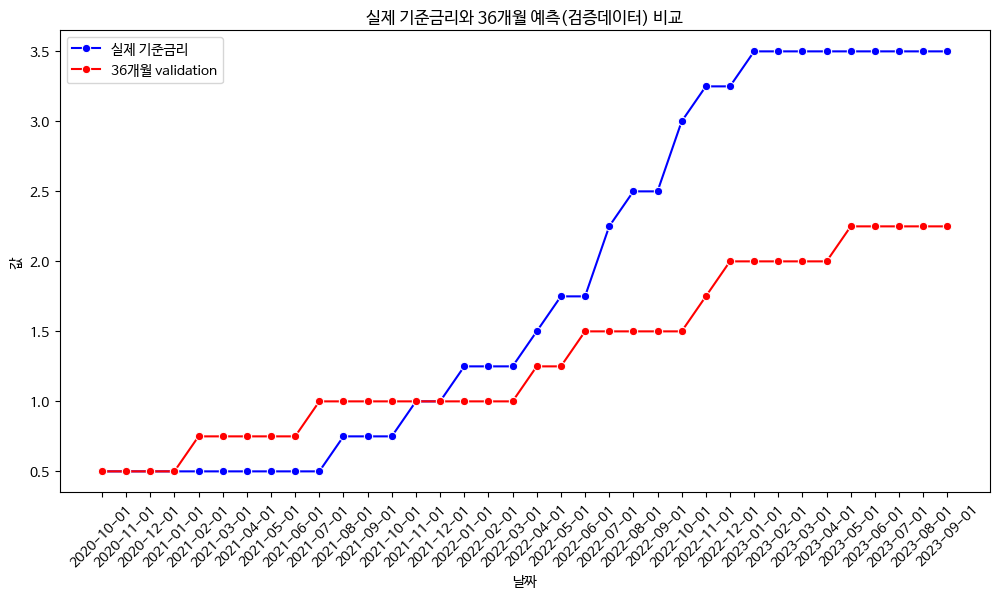

In [ ]:
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 라인 그래프 그리기
sns.lineplot(x='날짜', y='기준금리', data=total_valid, label='실제 기준금리', marker='o', c = 'b')
sns.lineplot(x='날짜', y='mean_36', data=total_valid, label='36개월 validation', marker='o', c = 'r')

plt.title('실제 기준금리와 36개월 예측(검증데이터) 비교')
plt.xlabel('날짜')
plt.ylabel('값')
plt.xticks(rotation=45)  # x축 라벨을 45도 기울임 (선택 사항)
plt.legend()  # 범례 표시

plt.show()

- 점수 계산 (MSE)

In [ ]:
round(sum((total_valid['기준금리'] - total_valid['mean_36']) ** 2) / 36,2)

0.74

- 점수 계산 (MAE)

In [ ]:
round(sum(abs(total_valid['기준금리'] - total_valid['mean_36'])) / 36, 2)

0.65

## 4.2 Validation 확인 - 30개월

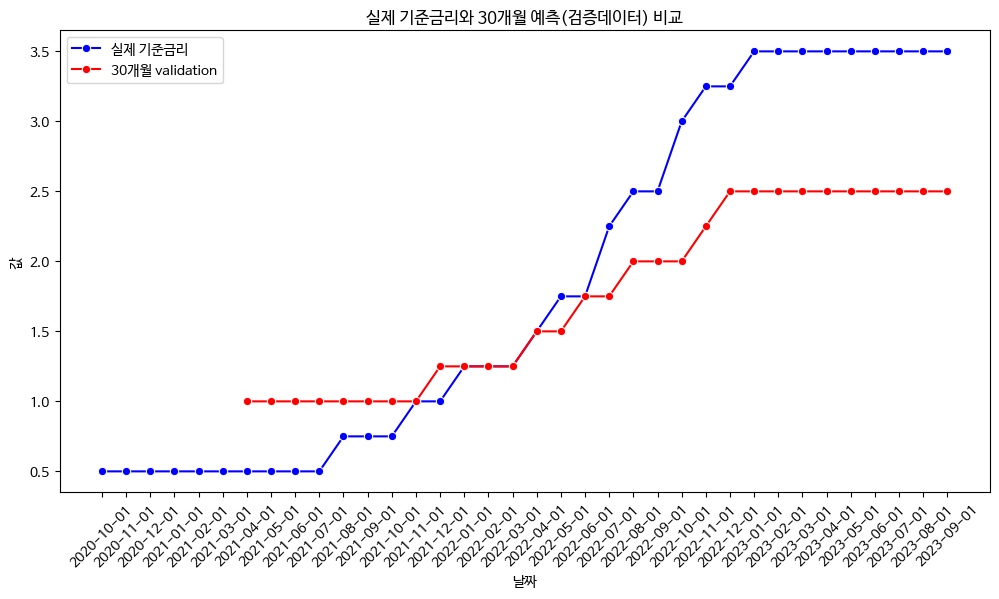

In [ ]:
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 라인 그래프 그리기
sns.lineplot(x='날짜', y='기준금리', data=total_valid, label='실제 기준금리', marker='o', c = 'b')
sns.lineplot(x='날짜', y='mean_30', data=total_valid, label='30개월 validation', marker='o', c = 'r')

plt.title('실제 기준금리와 30개월 예측(검증데이터) 비교')
plt.xlabel('날짜')
plt.ylabel('값')
plt.xticks(rotation=45)
plt.legend()

plt.show()

- 점수 계산 (MSE)

In [ ]:
round(sum((total_valid.iloc[6:,:]['기준금리'] - total_valid.iloc[6:,:]['mean_30']) ** 2) / 30, 2)

0.45

In [ ]:
round(sum(abs(total_valid.iloc[6:,:]['기준금리'] - total_valid.iloc[6:,:]['mean_30'])) / 30, 2)

0.55

## 4.3 Validation 확인 - 24개월

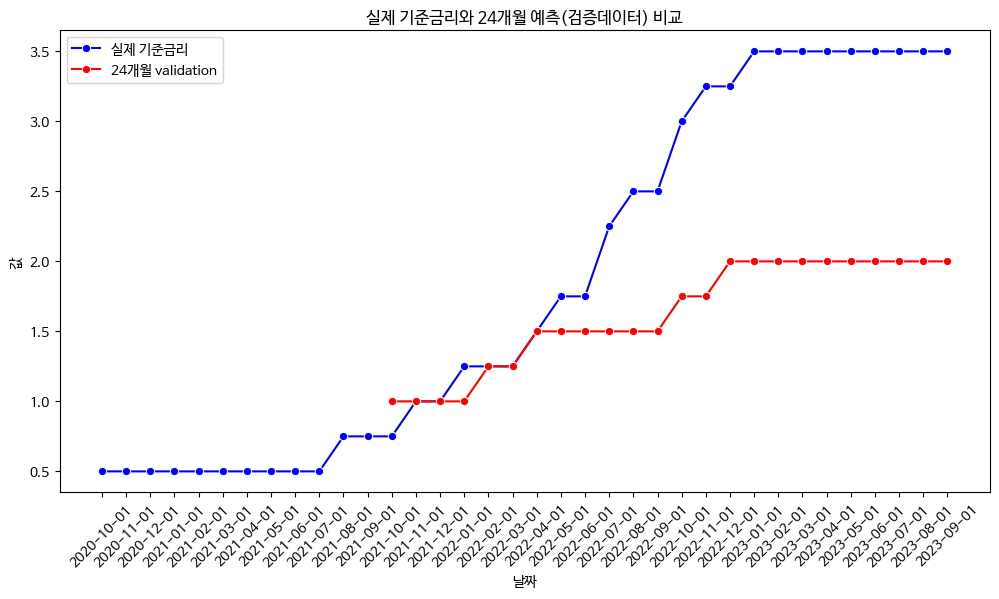

In [ ]:
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 라인 그래프 그리기
sns.lineplot(x='날짜', y='기준금리', data=total_valid, label='실제 기준금리', marker='o', c = 'b')
sns.lineplot(x='날짜', y='mean_24', data=total_valid, label='24개월 validation', marker='o', c = 'r')

plt.title('실제 기준금리와 24개월 예측(검증데이터) 비교')
plt.xlabel('날짜')
plt.ylabel('값')
plt.xticks(rotation=45)
plt.legend()

plt.show()

- 점수 계산 (MSE)

In [ ]:
round(sum((total_valid.iloc[12:,:]['기준금리'] - total_valid.iloc[12:,:]['mean_24']) ** 2) / 24, 2)

1.18

In [ ]:
round(sum(abs(total_valid.iloc[12:,:]['기준금리'] - total_valid.iloc[12:,:]['mean_24'])) / 24, 2)

0.89

## 4.4 Validation 확인 - 18개월

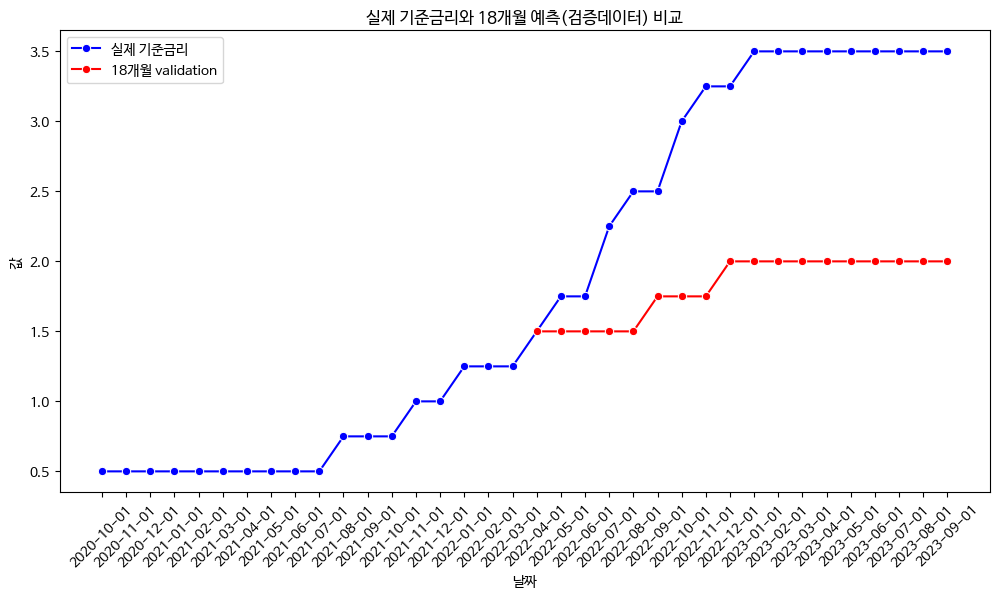

In [ ]:
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 라인 그래프 그리기
sns.lineplot(x='날짜', y='기준금리', data=total_valid, label='실제 기준금리', marker='o', c = 'b')
sns.lineplot(x='날짜', y='mean_18', data=total_valid, label='18개월 validation', marker='o', c = 'r')

plt.title('실제 기준금리와 18개월 예측(검증데이터) 비교')
plt.xlabel('날짜')
plt.ylabel('값')
plt.xticks(rotation=45)
plt.legend()

plt.show()

- 점수 계산 (MSE)

In [ ]:
round(sum((total_valid.iloc[18:,:]['기준금리'] - total_valid.iloc[18:,:]['mean_18']) ** 2) / 18, 2)

1.55

In [ ]:
round(sum(abs(total_valid.iloc[18:,:]['기준금리'] - total_valid.iloc[18:,:]['mean_18'])) / 18, 2)

1.14

## 4.5 Validation 확인 - 12개월

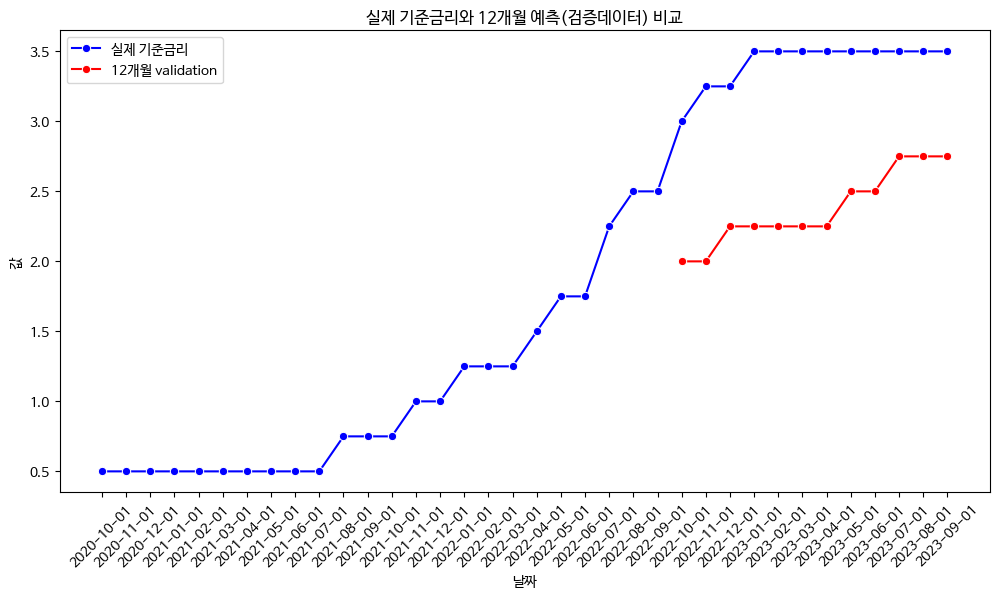

In [ ]:
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 라인 그래프 그리기
sns.lineplot(x='날짜', y='기준금리', data=total_valid, label='실제 기준금리', marker='o', c = 'b')
sns.lineplot(x='날짜', y='mean_12', data=total_valid, label='12개월 validation', marker='o', c = 'r')

plt.title('실제 기준금리와 12개월 예측(검증데이터) 비교')
plt.xlabel('날짜')
plt.ylabel('값')
plt.xticks(rotation=45)
plt.legend()

plt.show()

- 점수 계산 (MSE)

In [ ]:
round(sum((total_valid.iloc[24:,:]['기준금리'] - total_valid.iloc[24:,:]['mean_12']) ** 2) / 12, 2)

1.12

In [ ]:
round(sum(abs(total_valid.iloc[24:,:]['기준금리'] - total_valid.iloc[24:,:]['mean_12'])) / 12, 2)

1.04

## 4.6 Validation 확인 - 6개월

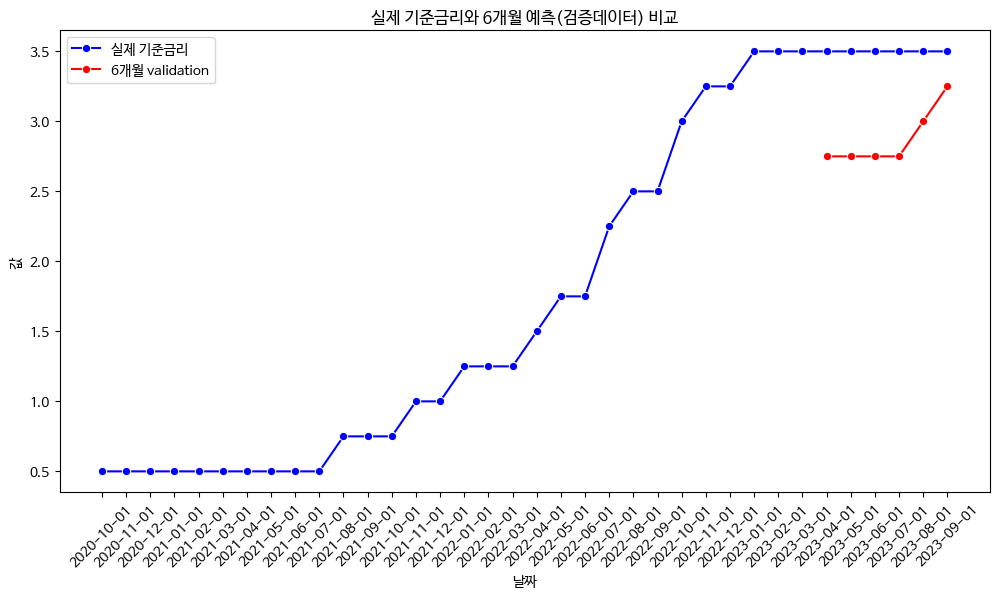

In [ ]:
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 라인 그래프 그리기
sns.lineplot(x='날짜', y='기준금리', data=total_valid, label='실제 기준금리', marker='o', c = 'b')
sns.lineplot(x='날짜', y='mean_6', data=total_valid, label='6개월 validation', marker='o', c = 'r')

plt.title('실제 기준금리와 6개월 예측(검증데이터) 비교')
plt.xlabel('날짜')
plt.ylabel('값')
plt.xticks(rotation=45)
plt.legend()

plt.show()

- 점수 계산 (MSE, MAE)

In [ ]:
round(sum((total_valid.iloc[30:,:]['기준금리'] - total_valid.iloc[30:,:]['mean_6']) ** 2) / 6, 2)

0.43

In [ ]:
round(sum(abs(total_valid.iloc[30:,:]['기준금리'] - total_valid.iloc[30:,:]['mean_6'])) / 6, 2)

0.62

## 4.7 Validation 확인 - 3개월

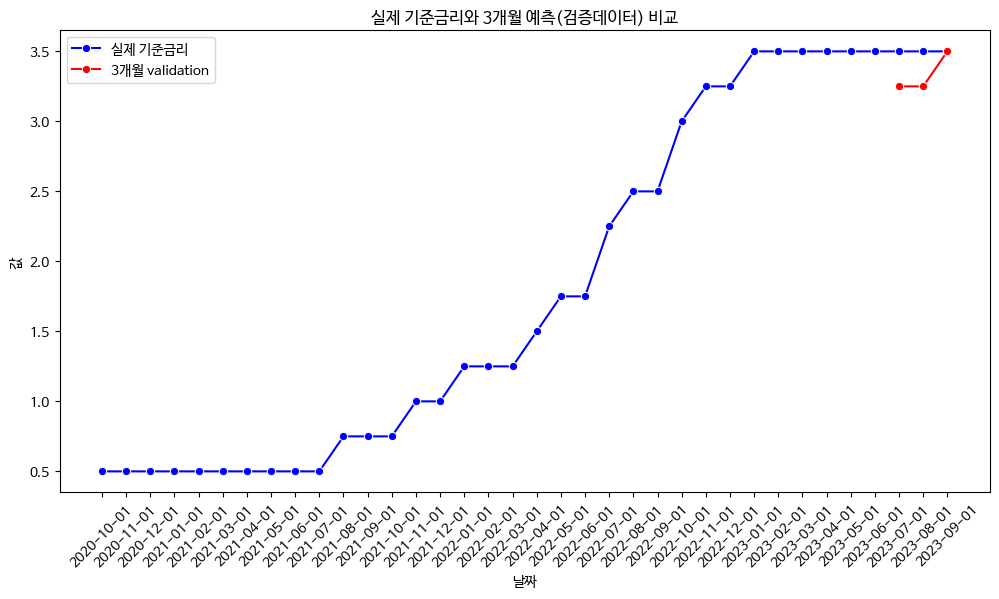

In [ ]:
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 라인 그래프 그리기
sns.lineplot(x='날짜', y='기준금리', data=total_valid, label='실제 기준금리', marker='o', c = 'b')
sns.lineplot(x='날짜', y='mean_3', data=total_valid, label='3개월 validation', marker='o', c = 'r')

plt.title('실제 기준금리와 3개월 예측(검증데이터) 비교')
plt.xlabel('날짜')
plt.ylabel('값')
plt.xticks(rotation=45)
plt.legend()

plt.show()

- 점수 계산 (MSE)

In [ ]:
round(sum((total_valid.iloc[33:,:]['기준금리'] - total_valid.iloc[33:,:]['mean_3']) ** 2) / 3, 2)

0.04

In [ ]:
round(sum(abs(total_valid.iloc[33:,:]['기준금리'] - total_valid.iloc[33:,:]['mean_3'])) / 3, 2)

0.17

# [5] Let's Predict !

## 5.1 AutoGluon 모델과 LSTM 결과 앙상블 (평균)

In [ ]:
total_predict = ag_result_df[['날짜']]

### 전처리

- 평균 계산

In [ ]:
total_predict['mean_36'] = (ag_result_df['mean_36'] + (lstm_result_df['mean_36'])) /2
total_predict['mean_30'] = (ag_result_df['mean_30'] + (lstm_result_df['mean_30'])) /2
total_predict['mean_24'] = (ag_result_df['mean_24'] + (lstm_result_df['mean_24'])) /2
total_predict['mean_18'] = (ag_result_df['mean_18'] + (lstm_result_df['mean_18'])) /2
total_predict['mean_12'] = (ag_result_df['mean_12'] + (lstm_result_df['mean_12'])) /2
total_predict['mean_6'] = (ag_result_df['mean_6'] + (lstm_result_df['mean_6'])) /2
total_predict['mean_3'] = (ag_result_df['mean_3'] + (lstm_result_df['mean_3']) ) /2

<ipython-input-67-5f74757222cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_predict['mean_36'] = (ag_result_df['mean_36'] + (lstm_result_df['mean_36'])) /2
<ipython-input-67-5f74757222cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_predict['mean_30'] = (ag_result_df['mean_30'] + (lstm_result_df['mean_30'])) /2
<ipython-input-67-5f74757222cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

- 0.25 단위로 스케일링

In [ ]:
reference_values = np.arange(0, 10, 0.25)
total_predict['mean_36_cut'] = np.where(~total_predict['mean_36'].isna(), total_predict['mean_36'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x))), np.nan)
total_predict['mean_30_cut'] = np.where(~total_predict['mean_30'].isna(), total_predict['mean_30'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x))), np.nan)
total_predict['mean_24_cut'] = np.where(~total_predict['mean_24'].isna(), total_predict['mean_24'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x))), np.nan)
total_predict['mean_18_cut'] = np.where(~total_predict['mean_18'].isna(), total_predict['mean_18'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x))), np.nan)
total_predict['mean_12_cut'] = np.where(~total_predict['mean_12'].isna(), total_predict['mean_12'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x))), np.nan)
total_predict['mean_6_cut'] = np.where(~total_predict['mean_6'].isna(), total_predict['mean_6'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x))), np.nan)
total_predict['mean_3_cut'] = np.where(~total_predict['mean_3'].isna(), total_predict['mean_3'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x))), np.nan)

<ipython-input-68-59ddb60a5afe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_predict['mean_36_cut'] = np.where(~total_predict['mean_36'].isna(), total_predict['mean_36'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x))), np.nan)
<ipython-input-68-59ddb60a5afe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_predict['mean_30_cut'] = np.where(~total_predict['mean_30'].isna(), total_predict['mean_30'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x))), np.nan)
<ipy

In [ ]:
total_predict['mean_total'] = total_predict[['mean_36', 'mean_30', 'mean_24', 'mean_18', 'mean_12', 'mean_6', 'mean_3']].mean(axis=1, skipna=True)
total_predict

,날짜,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3,mean_36_cut,mean_30_cut,mean_24_cut,mean_18_cut,mean_12_cut,mean_6_cut,mean_3_cut,mean_total
0,2023-10-01,3.096924,3.830666,3.739342,3.456140,3.336099,3.476384,3.516805,3.00,3.75,3.75,3.50,3.25,3.5,3.5,3.493194
1,2023-11-01,3.054337,3.846407,3.741575,3.458825,3.308881,3.435268,3.478515,3.00,3.75,3.75,3.50,3.25,3.5,3.5,3.474830
2,2023-12-01,3.078810,3.752186,3.671165,3.375096,3.230767,3.454064,3.500977,3.00,3.75,3.75,3.50,3.25,3.5,3.5,3.437581
3,2024-01-01,3.063876,3.645915,3.578310,3.260164,3.252264,3.395354,NaN,3.00,3.75,3.50,3.25,3.25,3.5,NaN,3.365981
4,2024-02-01,3.094563,3.689184,3.624158,3.287302,3.297181,3.436876,NaN,3.00,3.75,3.50,3.25,3.25,3.5,NaN,3.404877
5,2024-03-01,3.069148,3.598860,3.571583,3.161122,3.268817,3.414275,NaN,3.00,3.50,3.50,3.25,3.25,3.5,NaN,3.347301
6,2024-04-01,3.100042,3.544182,3.543847,3.059100,3.235684,NaN,NaN,3.00,3.50,3.50,3.00,3.25,NaN,NaN,3.296571
7,2024-05-01,3.091043,3.366990,3.451757,2.838363,3.105919,NaN,NaN,3.00,3.25,3.50,2.75,3.00,NaN,NaN,3.170814
8,2024-06-01,3.134246,3.286759,3.395859,2.747458,2.691439,NaN,NaN,3.25,3.25,3.50,2.75,2.75,NaN,NaN,3.051152
9,2024-07-01,3.085808,3.130881,3.279149,2.593196,2.297097,NaN,NaN,3.00,3.25,3.25,2.50,2.25,NaN,NaN,2.877226


In [ ]:
total_predict['mean_total_cut'] = total_predict[['mean_36_cut', 'mean_30_cut', 'mean_24_cut', 'mean_18_cut', 'mean_12_cut', 'mean_6_cut', 'mean_3_cut']].mean(axis=1, skipna=True)

- 0.25보다 크게 줄어들지 않았다면, 바로 이전값과 동일한 값으로 대체

In [ ]:
total_predict

,날짜,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3,mean_36_cut,mean_30_cut,mean_24_cut,mean_18_cut,mean_12_cut,mean_6_cut,mean_3_cut,mean_total,mean_total_cut
0,2023-10-01,3.096924,3.830666,3.739342,3.456140,3.336099,3.476384,3.516805,3.00,3.75,3.75,3.50,3.25,3.5,3.5,3.493194,3.464286
1,2023-11-01,3.054337,3.846407,3.741575,3.458825,3.308881,3.435268,3.478515,3.00,3.75,3.75,3.50,3.25,3.5,3.5,3.474830,3.464286
2,2023-12-01,3.078810,3.752186,3.671165,3.375096,3.230767,3.454064,3.500977,3.00,3.75,3.75,3.50,3.25,3.5,3.5,3.437581,3.464286
3,2024-01-01,3.063876,3.645915,3.578310,3.260164,3.252264,3.395354,NaN,3.00,3.75,3.50,3.25,3.25,3.5,NaN,3.365981,3.375000
4,2024-02-01,3.094563,3.689184,3.624158,3.287302,3.297181,3.436876,NaN,3.00,3.75,3.50,3.25,3.25,3.5,NaN,3.404877,3.375000
5,2024-03-01,3.069148,3.598860,3.571583,3.161122,3.268817,3.414275,NaN,3.00,3.50,3.50,3.25,3.25,3.5,NaN,3.347301,3.333333
6,2024-04-01,3.100042,3.544182,3.543847,3.059100,3.235684,NaN,NaN,3.00,3.50,3.50,3.00,3.25,NaN,NaN,3.296571,3.250000
7,2024-05-01,3.091043,3.366990,3.451757,2.838363,3.105919,NaN,NaN,3.00,3.25,3.50,2.75,3.00,NaN,NaN,3.170814,3.100000
8,2024-06-01,3.134246,3.286759,3.395859,2.747458,2.691439,NaN,NaN,3.25,3.25,3.50,2.75,2.75,NaN,NaN,3.051152,3.100000
9,2024-07-01,3.085808,3.130881,3.279149,2.593196,2.297097,NaN,NaN,3.00,3.25,3.25,2.50,2.25,NaN,NaN,2.877226,2.850000


In [ ]:
threshold = 0.25
total_predict['mean_0.25'] = total_predict['mean_total'].where((total_predict['mean_total'].diff().abs() >= threshold), total_predict['mean_total'].shift())
total_predict.at[0, 'mean_0.25'] = total_predict.at[0, 'mean_total']
total_predict

,날짜,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3,mean_36_cut,mean_30_cut,mean_24_cut,mean_18_cut,mean_12_cut,mean_6_cut,mean_3_cut,mean_total,mean_total_cut,mean_0.25
0,2023-10-01,3.096924,3.830666,3.739342,3.456140,3.336099,3.476384,3.516805,3.00,3.75,3.75,3.50,3.25,3.5,3.5,3.493194,3.464286,3.493194
1,2023-11-01,3.054337,3.846407,3.741575,3.458825,3.308881,3.435268,3.478515,3.00,3.75,3.75,3.50,3.25,3.5,3.5,3.474830,3.464286,3.493194
2,2023-12-01,3.078810,3.752186,3.671165,3.375096,3.230767,3.454064,3.500977,3.00,3.75,3.75,3.50,3.25,3.5,3.5,3.437581,3.464286,3.474830
3,2024-01-01,3.063876,3.645915,3.578310,3.260164,3.252264,3.395354,NaN,3.00,3.75,3.50,3.25,3.25,3.5,NaN,3.365981,3.375000,3.437581
4,2024-02-01,3.094563,3.689184,3.624158,3.287302,3.297181,3.436876,NaN,3.00,3.75,3.50,3.25,3.25,3.5,NaN,3.404877,3.375000,3.365981
5,2024-03-01,3.069148,3.598860,3.571583,3.161122,3.268817,3.414275,NaN,3.00,3.50,3.50,3.25,3.25,3.5,NaN,3.347301,3.333333,3.404877
6,2024-04-01,3.100042,3.544182,3.543847,3.059100,3.235684,NaN,NaN,3.00,3.50,3.50,3.00,3.25,NaN,NaN,3.296571,3.250000,3.347301
7,2024-05-01,3.091043,3.366990,3.451757,2.838363,3.105919,NaN,NaN,3.00,3.25,3.50,2.75,3.00,NaN,NaN,3.170814,3.100000,3.296571
8,2024-06-01,3.134246,3.286759,3.395859,2.747458,2.691439,NaN,NaN,3.25,3.25,3.50,2.75,2.75,NaN,NaN,3.051152,3.100000,3.170814
9,2024-07-01,3.085808,3.130881,3.279149,2.593196,2.297097,NaN,NaN,3.00,3.25,3.25,2.50,2.25,NaN,NaN,2.877226,2.850000,3.051152


## 5.2 예측 결과 시각화

### 평균 (다른 전처리 X)

In [ ]:
for_plot = eco_df[['날짜', '기준금리']]
for_plot_pred = total_predict[['날짜','mean_total']].rename(columns = {'mean_total':'기준금리'})

<ipython-input-74-fca2e9b7c150>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])


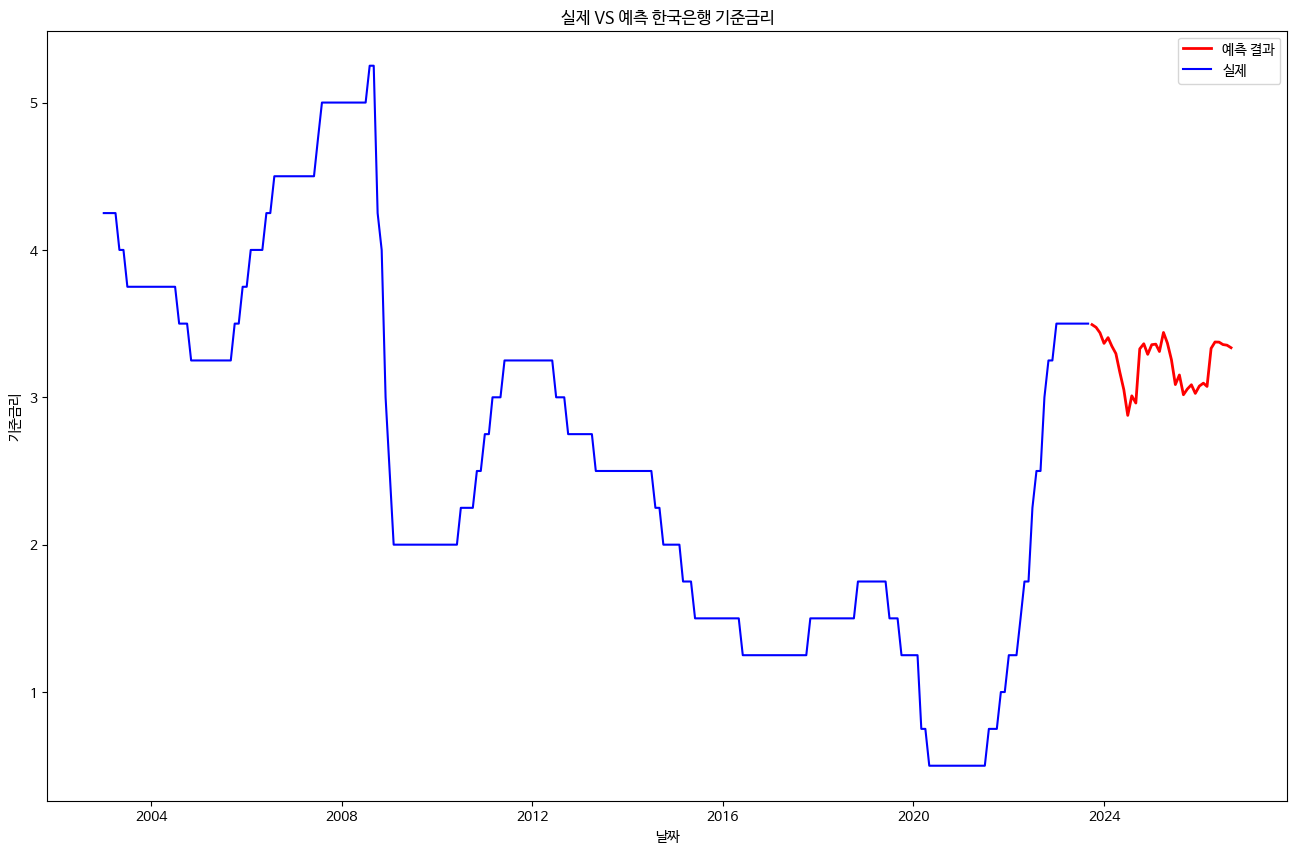

In [ ]:
for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])
for_plot_pred['날짜'] = pd.to_datetime(for_plot_pred['날짜'])

plt.figure(figsize=(16, 10))

plt.plot(for_plot_pred['날짜'], for_plot_pred['기준금리'], label='예측 결과', c = 'r',  linewidth=2)
plt.plot(for_plot['날짜'], for_plot['기준금리'], label='실제', c = 'b')

plt.title('실제 VS 예측 한국은행 기준금리')

plt.xlabel('날짜')

plt.ylabel('기준금리')

plt.legend()

plt.show()

### 평균 (사전 0.25 단위 스케일링)

In [ ]:
for_plot = eco_df[['날짜', '기준금리']]
for_plot_pred = total_predict[['날짜','mean_total_cut']].rename(columns = {'mean_total_cut':'기준금리'})

<ipython-input-150-fca2e9b7c150>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])


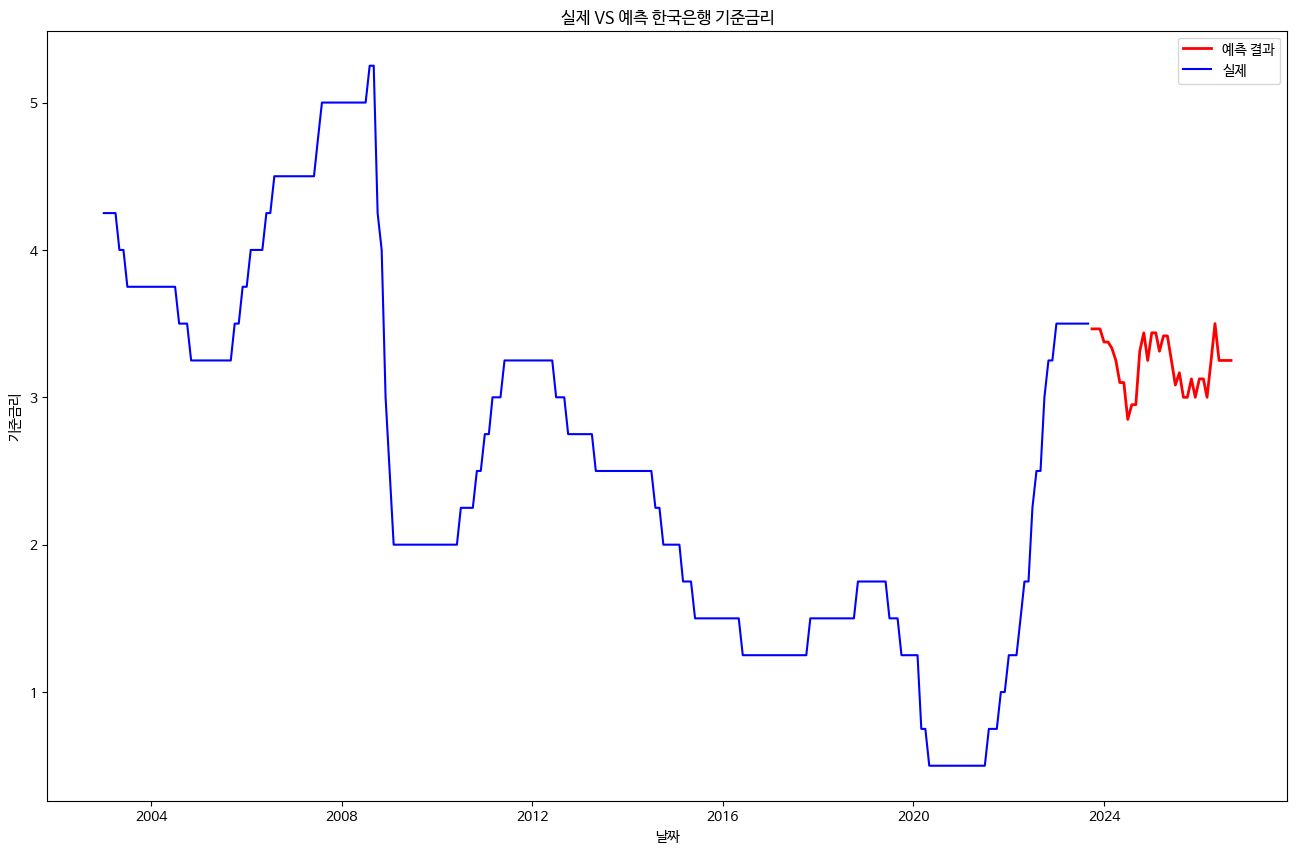

In [ ]:
for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])
for_plot_pred['날짜'] = pd.to_datetime(for_plot_pred['날짜'])

plt.figure(figsize=(16, 10))

plt.plot(for_plot_pred['날짜'], for_plot_pred['기준금리'], label='예측 결과', c = 'r',  linewidth=2)
plt.plot(for_plot['날짜'], for_plot['기준금리'], label='실제', c = 'b')

plt.title('실제 VS 예측 한국은행 기준금리')

plt.xlabel('날짜')

plt.ylabel('기준금리')

plt.legend()

plt.show()

## 5.3 0.25 % 단위로 스케일링

### 사전 전처리 X

In [ ]:
reference_values = np.arange(0, 5, 0.25)
total_predict['mean_0.25_cut'] = total_predict['mean_0.25'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x)))
total_predict

,날짜,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3,mean_36_cut,mean_30_cut,mean_24_cut,mean_18_cut,mean_12_cut,mean_6_cut,mean_3_cut,mean_total_cut,mean_total,mean_0.25,mean_0.25_cut
0,2023-10-01,3.096924,3.830666,3.739342,3.456140,3.336099,3.476384,3.516805,3.00,3.75,3.75,3.50,3.25,3.5,3.5,3.464286,3.493194,3.493194,3.50
1,2023-11-01,3.054337,3.846407,3.741575,3.458825,3.308881,3.435268,3.478515,3.00,3.75,3.75,3.50,3.25,3.5,3.5,3.464286,3.474830,3.493194,3.50
2,2023-12-01,3.078810,3.752186,3.671165,3.375096,3.230767,3.454064,3.500977,3.00,3.75,3.75,3.50,3.25,3.5,3.5,3.464286,3.437581,3.474830,3.50
3,2024-01-01,3.063876,3.645915,3.578310,3.260164,3.252264,3.395354,NaN,3.00,3.75,3.50,3.25,3.25,3.5,NaN,3.375000,3.365981,3.437581,3.50
4,2024-02-01,3.094563,3.689184,3.624158,3.287302,3.297181,3.436876,NaN,3.00,3.75,3.50,3.25,3.25,3.5,NaN,3.375000,3.404877,3.365981,3.25
5,2024-03-01,3.069148,3.598860,3.571583,3.161122,3.268817,3.414275,NaN,3.00,3.50,3.50,3.25,3.25,3.5,NaN,3.333333,3.347301,3.404877,3.50
6,2024-04-01,3.100042,3.544182,3.543847,3.059100,3.235684,NaN,NaN,3.00,3.50,3.50,3.00,3.25,NaN,NaN,3.250000,3.296571,3.347301,3.25
7,2024-05-01,3.091043,3.366990,3.451757,2.838363,3.105919,NaN,NaN,3.00,3.25,3.50,2.75,3.00,NaN,NaN,3.100000,3.170814,3.296571,3.25
8,2024-06-01,3.134246,3.286759,3.395859,2.747458,2.691439,NaN,NaN,3.25,3.25,3.50,2.75,2.75,NaN,NaN,3.100000,3.051152,3.170814,3.25
9,2024-07-01,3.085808,3.130881,3.279149,2.593196,2.297097,NaN,NaN,3.00,3.25,3.25,2.50,2.25,NaN,NaN,2.850000,2.877226,3.051152,3.00


In [ ]:
for i in range(1, len(total_predict)):
    diff = total_predict.loc[i, 'mean_0.25'] - total_predict.loc[i-1, 'mean_0.25']

    # 조건 1: 값이 0.5 이상 작아졌을 때, 0.25만큼만 하락된 값이 반영되도록 스무딩
    if diff <= -0.5:
        total_predict.loc[i, 'mean_0.25'] = total_predict.loc[i-1, 'mean_0.25'] - 0.25

    # 조건 2: 값이 0.5 이상 커졌을 , 0.25만큼만 상승된 값이 반영되도록 스무딩
    elif diff >= 0.5:
        total_predict.loc[i, 'mean_0.25'] = total_predict.loc[i-1, 'mean_0.25'] + 0.25

In [ ]:
for_plot = eco_df[['날짜', '기준금리']]
for_plot_pred = total_predict[['날짜','mean_0.25_cut']].rename(columns = {'mean_0.25_cut':'기준금리'})

<ipython-input-154-fca2e9b7c150>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])


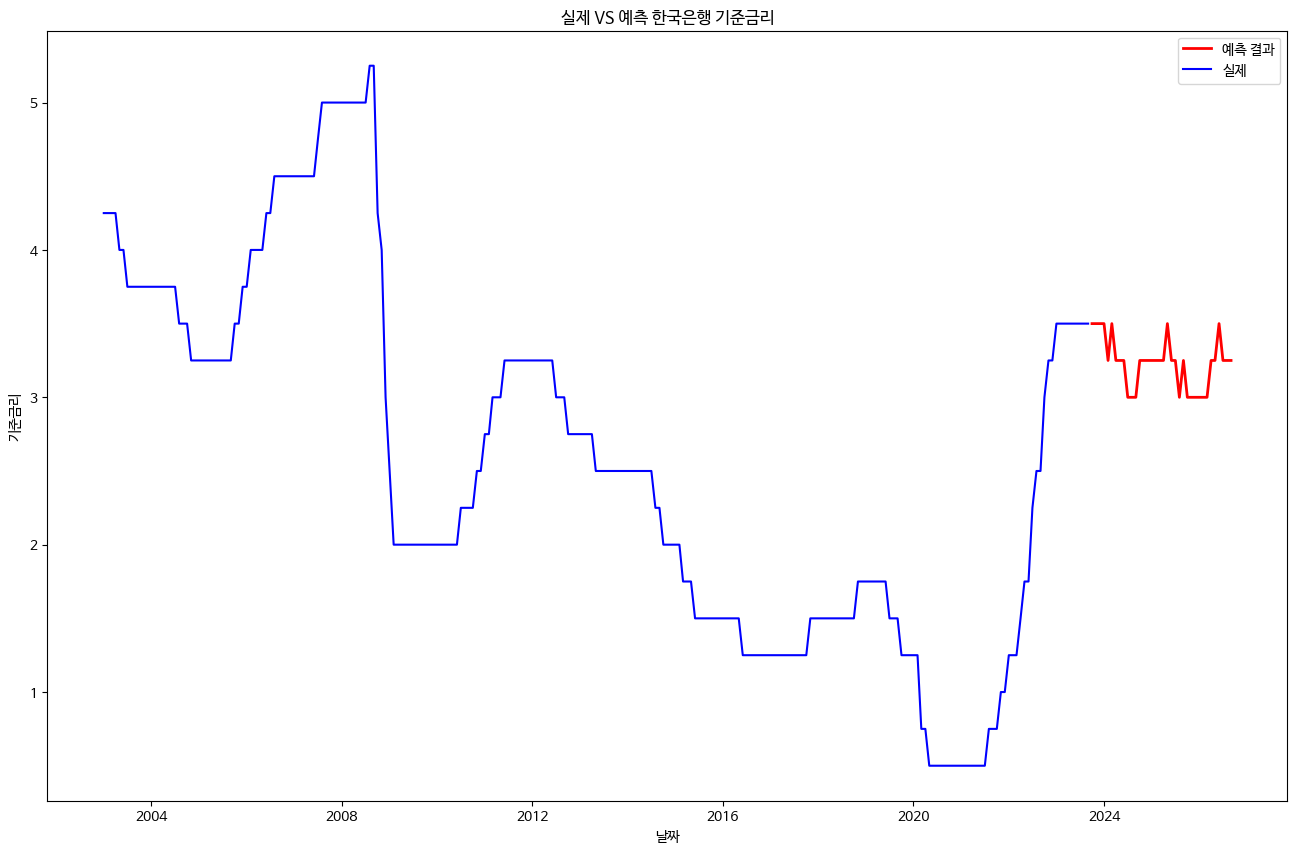

In [ ]:
for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])
for_plot_pred['날짜'] = pd.to_datetime(for_plot_pred['날짜'])

plt.figure(figsize=(16, 10))

plt.plot(for_plot_pred['날짜'], for_plot_pred['기준금리'], label='예측 결과', c = 'r',  linewidth=2)
plt.plot(for_plot['날짜'], for_plot['기준금리'], label='실제', c = 'b')

plt.title('실제 VS 예측 한국은행 기준금리')

plt.xlabel('날짜')

plt.ylabel('기준금리')

plt.legend()

plt.show()

### 사전 전처리 (0.25 단위 스케일링)

In [ ]:
reference_values = np.arange(0, 10, 0.25)
total_predict['mean_0.25_cut_cut'] = total_predict['mean_total_cut'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x)))
total_predict

,날짜,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3,mean_36_cut,mean_30_cut,mean_24_cut,mean_18_cut,mean_12_cut,mean_6_cut,mean_3_cut,mean_total_cut,mean_total,mean_0.25,mean_0.25_cut,mean_0.25_cut_cut
0,2023-10-01,3.096924,3.830666,3.739342,3.456140,3.336099,3.476384,3.516805,3.00,3.75,3.75,3.50,3.25,3.5,3.5,3.464286,3.493194,3.493194,3.50,3.50
1,2023-11-01,3.054337,3.846407,3.741575,3.458825,3.308881,3.435268,3.478515,3.00,3.75,3.75,3.50,3.25,3.5,3.5,3.464286,3.474830,3.493194,3.50,3.50
2,2023-12-01,3.078810,3.752186,3.671165,3.375096,3.230767,3.454064,3.500977,3.00,3.75,3.75,3.50,3.25,3.5,3.5,3.464286,3.437581,3.474830,3.50,3.50
3,2024-01-01,3.063876,3.645915,3.578310,3.260164,3.252264,3.395354,NaN,3.00,3.75,3.50,3.25,3.25,3.5,NaN,3.375000,3.365981,3.437581,3.50,3.25
4,2024-02-01,3.094563,3.689184,3.624158,3.287302,3.297181,3.436876,NaN,3.00,3.75,3.50,3.25,3.25,3.5,NaN,3.375000,3.404877,3.365981,3.25,3.25
5,2024-03-01,3.069148,3.598860,3.571583,3.161122,3.268817,3.414275,NaN,3.00,3.50,3.50,3.25,3.25,3.5,NaN,3.333333,3.347301,3.404877,3.50,3.25
6,2024-04-01,3.100042,3.544182,3.543847,3.059100,3.235684,NaN,NaN,3.00,3.50,3.50,3.00,3.25,NaN,NaN,3.250000,3.296571,3.347301,3.25,3.25
7,2024-05-01,3.091043,3.366990,3.451757,2.838363,3.105919,NaN,NaN,3.00,3.25,3.50,2.75,3.00,NaN,NaN,3.100000,3.170814,3.296571,3.25,3.00
8,2024-06-01,3.134246,3.286759,3.395859,2.747458,2.691439,NaN,NaN,3.25,3.25,3.50,2.75,2.75,NaN,NaN,3.100000,3.051152,3.170814,3.25,3.00
9,2024-07-01,3.085808,3.130881,3.279149,2.593196,2.297097,NaN,NaN,3.00,3.25,3.25,2.50,2.25,NaN,NaN,2.850000,2.877226,3.051152,3.00,2.75


In [ ]:
for_plot = eco_df[['날짜', '기준금리']]
for_plot_pred = total_predict[['날짜','mean_0.25_cut_cut']].rename(columns = {'mean_0.25_cut_cut':'기준금리'})

<ipython-input-157-fca2e9b7c150>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])


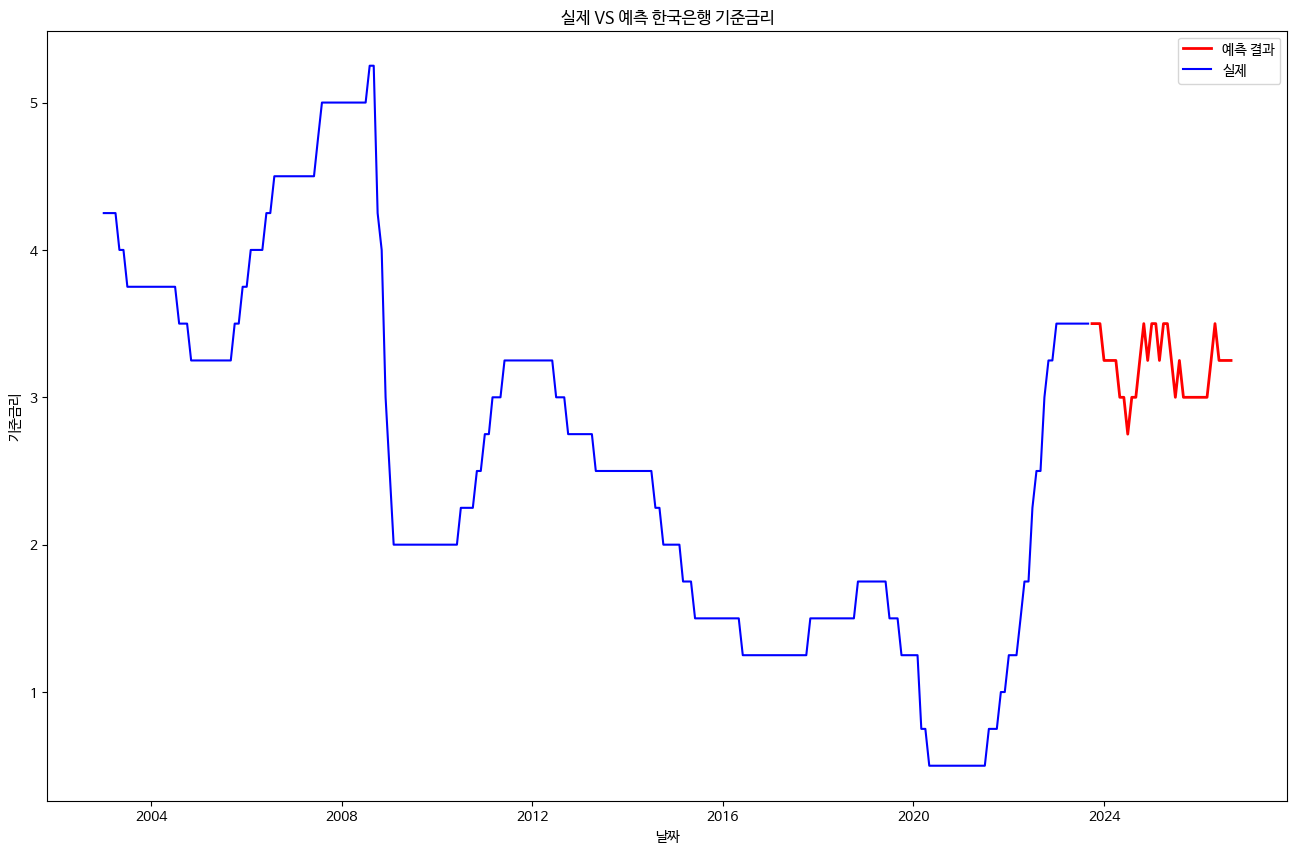

In [ ]:
for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])
for_plot_pred['날짜'] = pd.to_datetime(for_plot_pred['날짜'])

plt.figure(figsize=(16, 10))

plt.plot(for_plot_pred['날짜'], for_plot_pred['기준금리'], label='예측 결과', c = 'r',  linewidth=2)
plt.plot(for_plot['날짜'], for_plot['기준금리'], label='실제', c = 'b')

plt.title('실제 VS 예측 한국은행 기준금리')

plt.xlabel('날짜')

plt.ylabel('기준금리')

plt.legend()

plt.show()

## 5-4. Rolling

### 일반 평균 -> 0.25% 단위로 스케일링 -> window size = 3으로 Rolling

- 롤링

In [ ]:
window_size = 3
total_predict['mean_0.25_roll'] = total_predict['mean_0.25_cut'].rolling(window=window_size).mean()

In [ ]:
reference_values = np.arange(0, 10, 0.25)
total_predict['mean_0.25_roll'] = total_predict['mean_0.25_cut'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x)))
total_predict['mean_0.25_roll']

0     3.50
1     3.50
2     3.50
3     3.50
4     3.25
5     3.50
6     3.25
7     3.25
8     3.25
9     3.00
10    3.00
11    3.00
12    3.25
13    3.25
14    3.25
15    3.25
16    3.25
17    3.25
18    3.25
19    3.50
20    3.25
21    3.25
22    3.00
23    3.25
24    3.00
25    3.00
26    3.00
27    3.00
28    3.00
29    3.00
30    3.25
31    3.25
32    3.50
33    3.25
34    3.25
35    3.25
Name: mean_0.25_roll, dtype: float64

<ipython-input-160-614ee9189d39>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])


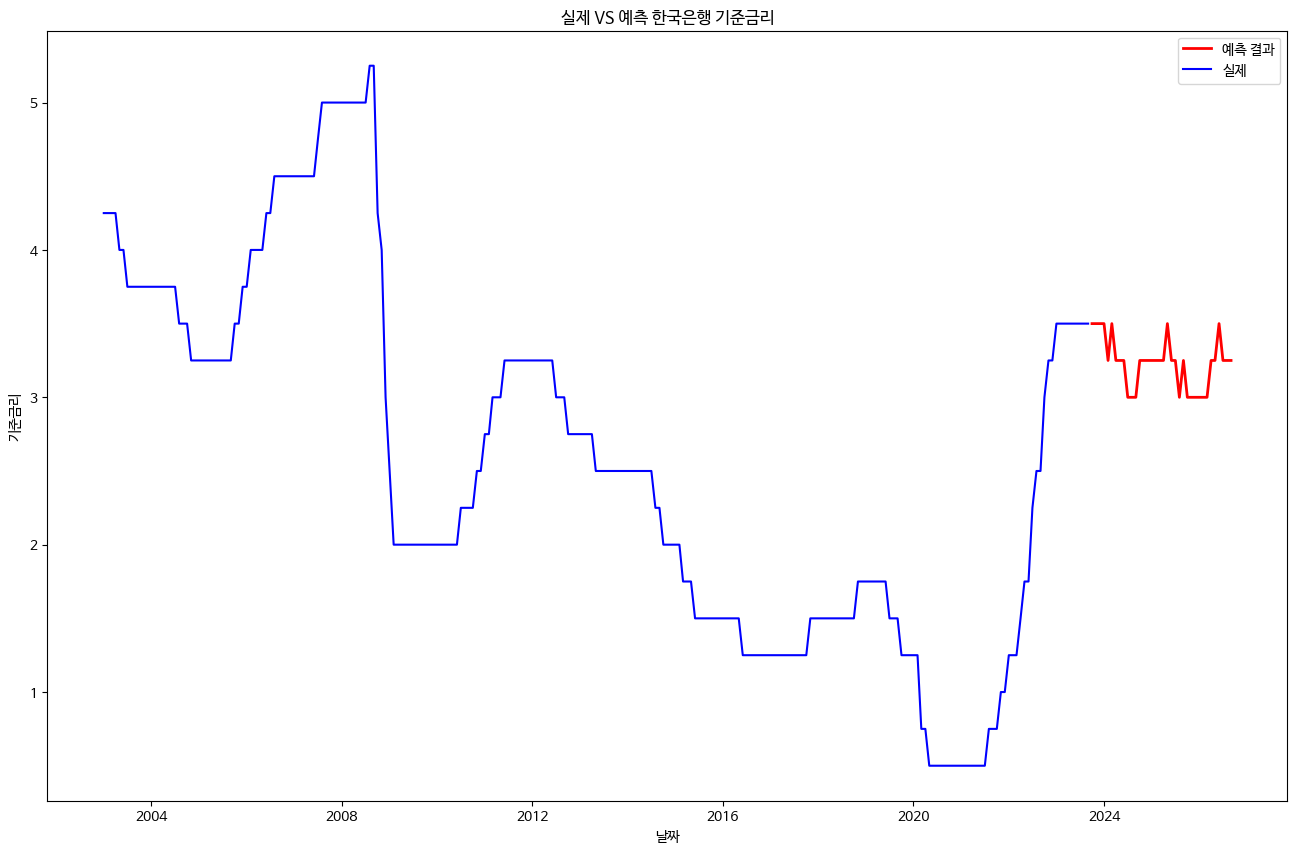

In [ ]:
for_plot = eco_df[['날짜', '기준금리']]
for_plot_pred = total_predict[['날짜','mean_0.25_roll']].rename(columns = {'mean_0.25_roll':'기준금리'})

for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])
for_plot_pred['날짜'] = pd.to_datetime(for_plot_pred['날짜'])

plt.figure(figsize=(16, 10))

plt.plot(for_plot_pred['날짜'], for_plot_pred['기준금리'], label='예측 결과', c = 'r',  linewidth=2)
plt.plot(for_plot['날짜'], for_plot['기준금리'], label='실제', c = 'b')

plt.title('실제 VS 예측 한국은행 기준금리')

plt.xlabel('날짜')

plt.ylabel('기준금리')

plt.legend()

plt.show()

### 결괏값 0.25 단위 스케일링 -> 일반 평균 -> 0.25 단위 스케일링 -> window size = 3으로 롤링

In [ ]:
window_size = 3
total_predict['mean_0.25_roll_cut'] = total_predict['mean_0.25_cut_cut'].rolling(window=window_size).mean()

In [ ]:
reference_values = np.arange(0, 10, 0.25)
total_predict['mean_0.25_roll_cut'] = total_predict['mean_0.25_roll_cut'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x)))

<ipython-input-163-983753653b38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_predict['mean_0.25_roll_cut'][0:2] = total_predict['mean_0.25_cut_cut'][0:2] # 결측값은 Rolling 이전의 값으로 대체
<ipython-input-163-983753653b38>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])


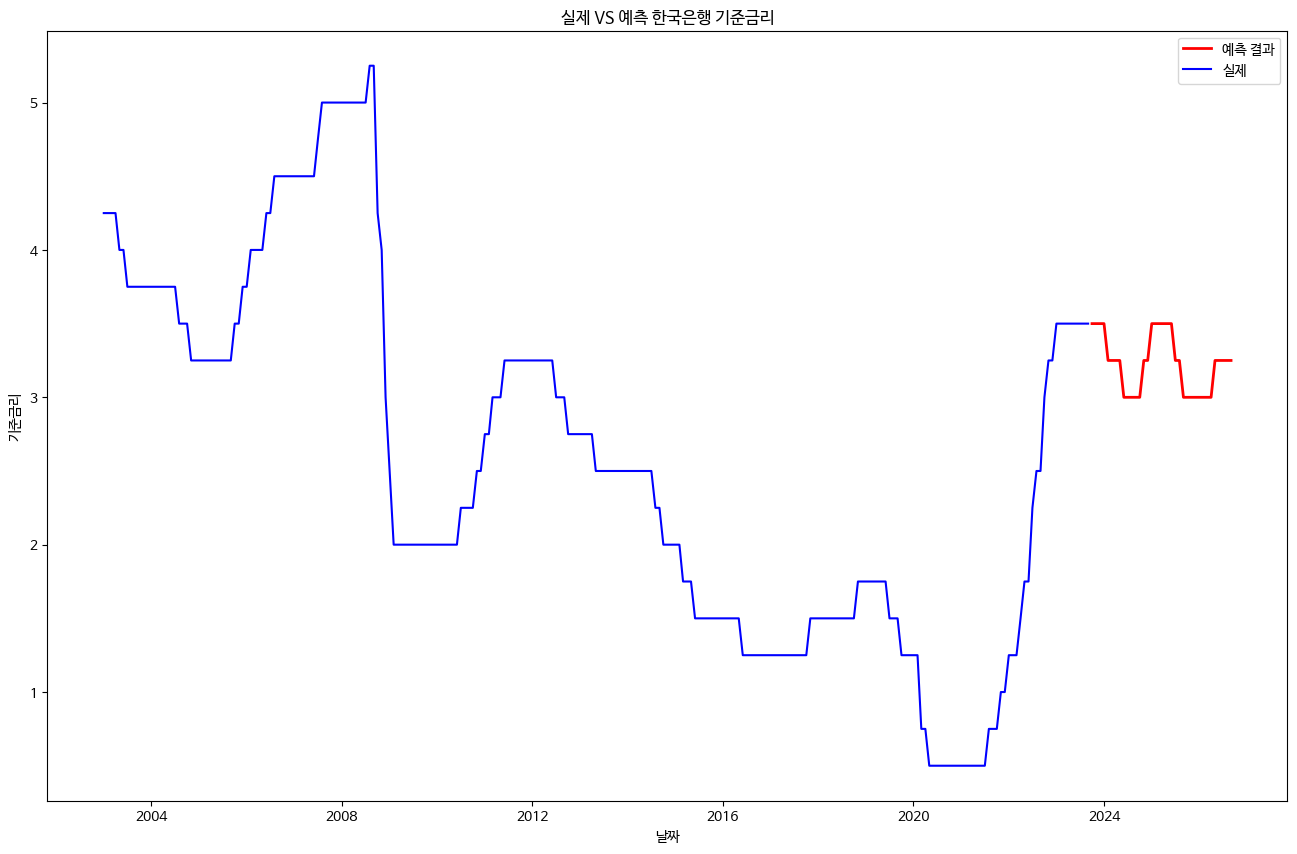

In [ ]:
total_predict['mean_0.25_roll_cut'][0:2] = total_predict['mean_0.25_cut_cut'][0:2] # 결측값은 Rolling 이전의 값으로 대체
for_plot = eco_df[['날짜', '기준금리']]
for_plot_pred = total_predict[['날짜','mean_0.25_roll_cut']].rename(columns = {'mean_0.25_roll_cut':'기준금리'})

for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])
for_plot_pred['날짜'] = pd.to_datetime(for_plot_pred['날짜'])

plt.figure(figsize=(16, 10))

plt.plot(for_plot_pred['날짜'], for_plot_pred['기준금리'], label='예측 결과', c = 'r',  linewidth=2)
plt.plot(for_plot['날짜'], for_plot['기준금리'], label='실제', c = 'b')

plt.title('실제 VS 예측 한국은행 기준금리')

plt.xlabel('날짜')

plt.ylabel('기준금리')

plt.legend()

plt.show()

In [ ]:
total_predict

,날짜,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3,mean_36_cut,mean_30_cut,...,mean_12_cut,mean_6_cut,mean_3_cut,mean_total_cut,mean_total,mean_0.25,mean_0.25_cut,mean_0.25_cut_cut,mean_0.25_roll,mean_0.25_roll_cut
0,2023-10-01,3.096924,3.830666,3.739342,3.456140,3.336099,3.476384,3.516805,3.00,3.75,...,3.25,3.5,3.5,3.464286,3.493194,3.493194,3.50,3.50,3.50,3.50
1,2023-11-01,3.054337,3.846407,3.741575,3.458825,3.308881,3.435268,3.478515,3.00,3.75,...,3.25,3.5,3.5,3.464286,3.474830,3.493194,3.50,3.50,3.50,3.50
2,2023-12-01,3.078810,3.752186,3.671165,3.375096,3.230767,3.454064,3.500977,3.00,3.75,...,3.25,3.5,3.5,3.464286,3.437581,3.474830,3.50,3.50,3.50,3.50
3,2024-01-01,3.063876,3.645915,3.578310,3.260164,3.252264,3.395354,NaN,3.00,3.75,...,3.25,3.5,NaN,3.375000,3.365981,3.437581,3.50,3.25,3.50,3.50
4,2024-02-01,3.094563,3.689184,3.624158,3.287302,3.297181,3.436876,NaN,3.00,3.75,...,3.25,3.5,NaN,3.375000,3.404877,3.365981,3.25,3.25,3.25,3.25
5,2024-03-01,3.069148,3.598860,3.571583,3.161122,3.268817,3.414275,NaN,3.00,3.50,...,3.25,3.5,NaN,3.333333,3.347301,3.404877,3.50,3.25,3.50,3.25
6,2024-04-01,3.100042,3.544182,3.543847,3.059100,3.235684,NaN,NaN,3.00,3.50,...,3.25,NaN,NaN,3.250000,3.296571,3.347301,3.25,3.25,3.25,3.25
7,2024-05-01,3.091043,3.366990,3.451757,2.838363,3.105919,NaN,NaN,3.00,3.25,...,3.00,NaN,NaN,3.100000,3.170814,3.296571,3.25,3.00,3.25,3.25
8,2024-06-01,3.134246,3.286759,3.395859,2.747458,2.691439,NaN,NaN,3.25,3.25,...,2.75,NaN,NaN,3.100000,3.051152,3.170814,3.25,3.00,3.25,3.00
9,2024-07-01,3.085808,3.130881,3.279149,2.593196,2.297097,NaN,NaN,3.00,3.25,...,2.25,NaN,NaN,2.850000,2.877226,3.051152,3.00,2.75,3.00,3.00


In [ ]:
total_predict.to_csv('/content/drive/MyDrive/ASAC_최종프로젝트/★ 한석 ★/3.경제지표데이터/final_predict_result.csv', encoding = 'utf-8', index = False)

# [6] 미국 금리 예측 결과 확인

In [ ]:
ag_result_df = pd.read_csv('/content/drive/MyDrive/ASAC_최종프로젝트/★ 한석 ★/3.경제지표데이터/autogluon_result_ame_3.csv')

In [ ]:
ag_result_df['mean_total'] = ag_result_df[['mean_36', 'mean_30', 'mean_24', 'mean_18', 'mean_12', 'mean_6', 'mean_3']].mean(axis=1, skipna=True)
ag_result_df

,날짜,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3,mean_total
0,2023-10-01,1.391259,1.395288,5.709195,3.981044,5.440958,5.305210,5.187369,4.058617
1,2023-11-01,1.130678,1.139124,6.383365,4.074464,5.833009,5.312326,5.090091,4.137580
2,2023-12-01,1.369512,1.353772,6.690510,4.275834,6.013081,5.317488,5.165521,4.312245
3,2024-01-01,1.466989,1.474293,6.895930,4.385997,6.142523,5.321232,NaN,4.281161
4,2024-02-01,1.599397,1.594993,7.098322,4.521171,6.277064,5.323948,NaN,4.402482
5,2024-03-01,1.536176,1.547393,7.081927,4.523995,6.322384,5.325918,NaN,4.389632
6,2024-04-01,1.250961,1.313598,7.175834,4.485361,6.424219,NaN,NaN,4.129995
7,2024-05-01,1.491335,1.458338,7.277965,4.607309,6.296985,NaN,NaN,4.226386
8,2024-06-01,1.440943,1.472614,7.205182,4.536202,6.229470,NaN,NaN,4.176882
9,2024-07-01,1.316299,1.346098,7.200873,4.422859,6.251935,NaN,NaN,4.107613


In [ ]:
# threshold = 0.25
# ag_result_df['mean_0.25'] = ag_result_df['mean_total'].where((ag_result_df['mean_total'].diff().abs() >= threshold), ag_result_df['mean_total'].shift())
# ag_result_df.at[0, 'mean_0.25'] = ag_result_df.at[0, 'mean_total']
# ag_result_df

## 6.1 예측 결과 시각화

In [ ]:
for_plot = eco_df[['날짜', '미_금리']]
for_plot_pred = ag_result_df[['날짜','mean_total']].rename(columns = {'mean_total':'기준금리'})

<ipython-input-184-647fc1f12237>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])


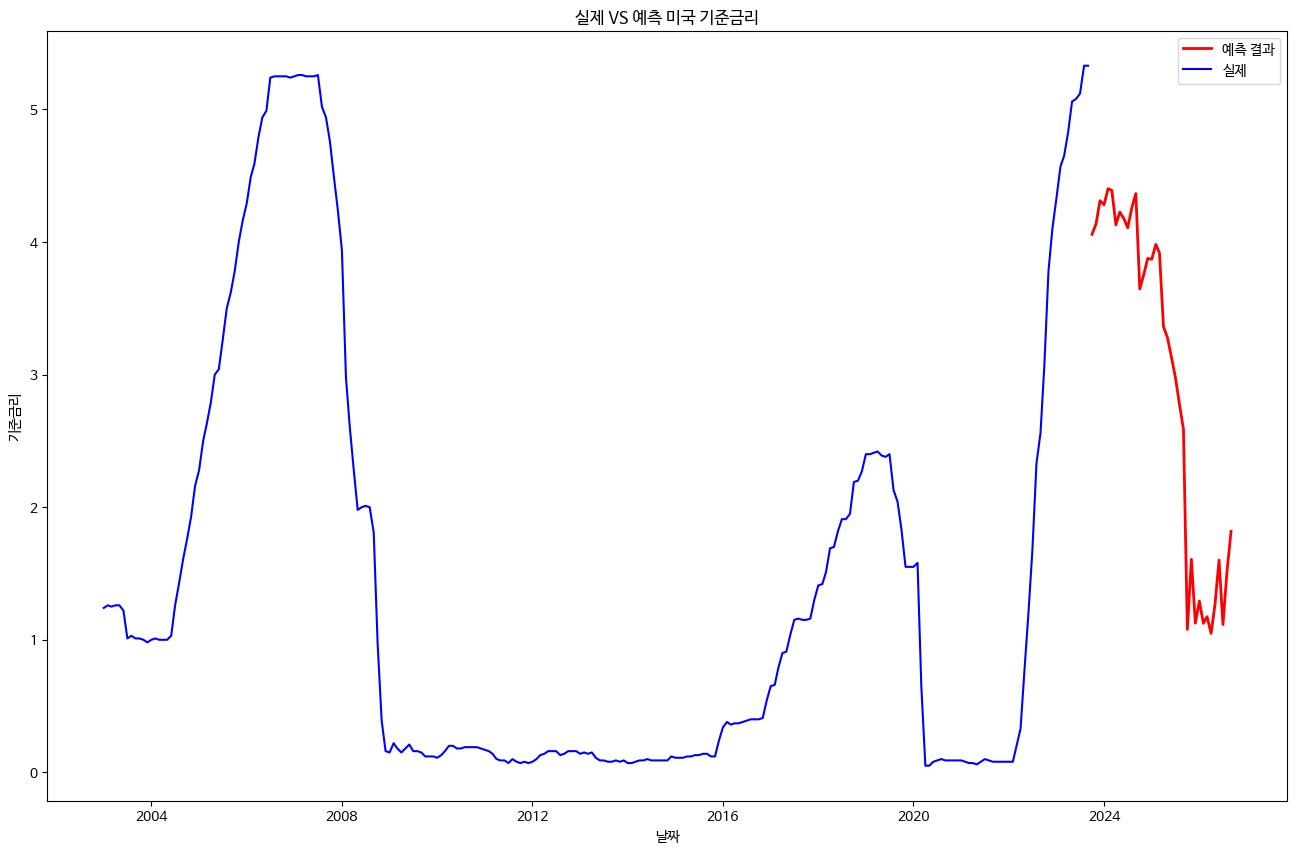

In [ ]:
for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])
for_plot_pred['날짜'] = pd.to_datetime(for_plot_pred['날짜'])

plt.figure(figsize=(16, 10))

plt.plot(for_plot_pred['날짜'], for_plot_pred['기준금리'], label='예측 결과', c = 'r',  linewidth=2)
plt.plot(for_plot['날짜'], for_plot['미_금리'], label='실제', c = 'b')

plt.title('실제 VS 예측 미국 기준금리')

plt.xlabel('날짜')

plt.ylabel('기준금리')

plt.legend()

plt.show()

## 6.2 0.25 Thresh hold

In [ ]:
threshold = 0.25
ag_result_df['mean_0.25'] = ag_result_df['mean_total'].where((ag_result_df['mean_total'].diff().abs() >= threshold), ag_result_df['mean_total'].shift())
ag_result_df.at[0, 'mean_0.25'] = ag_result_df.at[0, 'mean_total']
ag_result_df

,날짜,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3,mean_total,mean_0.25,mean_total_0.25_cut,mean_0.25_cut,mean_0.25_roll
0,2023-10-01,1.391259,1.395288,5.709195,3.981044,5.440958,5.305210,5.187369,4.058617,4.058617,4.00,4.00,4.00
1,2023-11-01,1.130678,1.139124,6.383365,4.074464,5.833009,5.312326,5.090091,4.137580,4.058617,4.25,4.00,4.00
2,2023-12-01,1.369512,1.353772,6.690510,4.275834,6.013081,5.317488,5.165521,4.312245,4.137580,4.25,4.25,4.25
3,2024-01-01,1.466989,1.474293,6.895930,4.385997,6.142523,5.321232,NaN,4.281161,4.312245,4.25,4.25,4.25
4,2024-02-01,1.599397,1.594993,7.098322,4.521171,6.277064,5.323948,NaN,4.402482,4.281161,4.50,4.25,4.25
5,2024-03-01,1.536176,1.547393,7.081927,4.523995,6.322384,5.325918,NaN,4.389632,4.402482,4.50,4.50,4.50
6,2024-04-01,1.250961,1.313598,7.175834,4.485361,6.424219,NaN,NaN,4.129995,4.129995,4.25,4.25,4.25
7,2024-05-01,1.491335,1.458338,7.277965,4.607309,6.296985,NaN,NaN,4.226386,4.129995,4.25,4.25,4.25
8,2024-06-01,1.440943,1.472614,7.205182,4.536202,6.229470,NaN,NaN,4.176882,4.226386,4.25,4.25,4.25
9,2024-07-01,1.316299,1.346098,7.200873,4.422859,6.251935,NaN,NaN,4.107613,4.176882,4.00,4.25,4.25


In [ ]:
for_plot = eco_df[['날짜', '미_금리']]
for_plot_pred = ag_result_df[['날짜','mean_0.25']].rename(columns = {'mean_0.25':'기준금리'})

In [ ]:
for i in range(1, len(ag_result_df)):
    diff = ag_result_df.loc[i, 'mean_0.25'] - ag_result_df.loc[i-1, 'mean_0.25']

    # 조건 1: 값이 0.5 이상 작아졌을 때, 0.25만큼만 하락된 값이 반영되도록 스무딩
    if diff <= -0.5:
        ag_result_df.loc[i, 'mean_0.25'] = ag_result_df.loc[i-1, 'mean_0.25'] - 0.25

    # 조건 2: 값이 0.5 이상 커졌을 , 0.25만큼만 상승된 값이 반영되도록 스무딩
    elif diff >= 0.5:
        ag_result_df.loc[i, 'mean_0.25'] = ag_result_df.loc[i-1, 'mean_0.25'] + 0.25

<ipython-input-170-647fc1f12237>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])


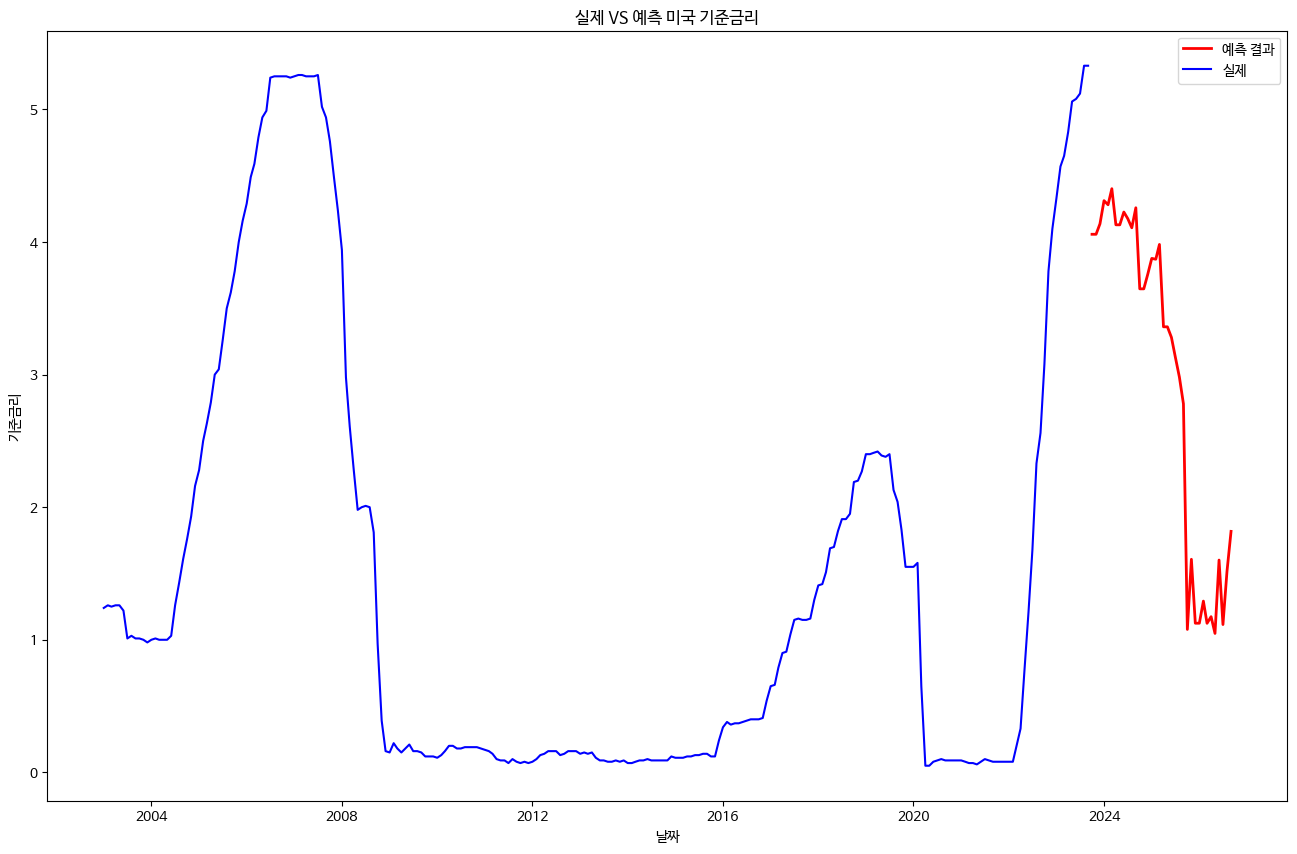

In [ ]:
for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])
for_plot_pred['날짜'] = pd.to_datetime(for_plot_pred['날짜'])

plt.figure(figsize=(16, 10))

plt.plot(for_plot_pred['날짜'], for_plot_pred['기준금리'], label='예측 결과', c = 'r',  linewidth=2)
plt.plot(for_plot['날짜'], for_plot['미_금리'], label='실제', c = 'b')

plt.title('실제 VS 예측 미국 기준금리')

plt.xlabel('날짜')

plt.ylabel('기준금리')

plt.legend()

plt.show()

## 6.3 mean_total 기준 0.25로 스무딩

In [ ]:
reference_values = np.arange(0, 5, 0.25)

ag_result_df['mean_total_0.25_cut'] = ag_result_df['mean_total'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x)))

ag_result_df

,날짜,mean_36,mean_30,mean_24,mean_18,mean_12,mean_6,mean_3,mean_total,mean_0.25,mean_total_0.25_cut,mean_0.25_cut,mean_0.25_roll
0,2023-10-01,1.391259,1.395288,5.709195,3.981044,5.440958,5.305210,5.187369,4.058617,4.058617,4.00,4.00,4.00
1,2023-11-01,1.130678,1.139124,6.383365,4.074464,5.833009,5.312326,5.090091,4.137580,4.058617,4.25,4.00,4.00
2,2023-12-01,1.369512,1.353772,6.690510,4.275834,6.013081,5.317488,5.165521,4.312245,4.137580,4.25,4.25,4.25
3,2024-01-01,1.466989,1.474293,6.895930,4.385997,6.142523,5.321232,NaN,4.281161,4.312245,4.25,4.25,4.25
4,2024-02-01,1.599397,1.594993,7.098322,4.521171,6.277064,5.323948,NaN,4.402482,4.281161,4.50,4.25,4.25
5,2024-03-01,1.536176,1.547393,7.081927,4.523995,6.322384,5.325918,NaN,4.389632,4.402482,4.50,4.50,4.50
6,2024-04-01,1.250961,1.313598,7.175834,4.485361,6.424219,NaN,NaN,4.129995,4.129995,4.25,4.25,4.25
7,2024-05-01,1.491335,1.458338,7.277965,4.607309,6.296985,NaN,NaN,4.226386,4.129995,4.25,4.25,4.25
8,2024-06-01,1.440943,1.472614,7.205182,4.536202,6.229470,NaN,NaN,4.176882,4.226386,4.25,4.25,4.25
9,2024-07-01,1.316299,1.346098,7.200873,4.422859,6.251935,NaN,NaN,4.107613,4.176882,4.00,4.25,4.25


In [ ]:
for_plot = eco_df[['날짜', '미_금리']]
for_plot_pred = ag_result_df[['날짜','mean_total_0.25_cut']].rename(columns = {'mean_total_0.25_cut':'기준금리'})

<ipython-input-173-4ffb18fa6cc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])


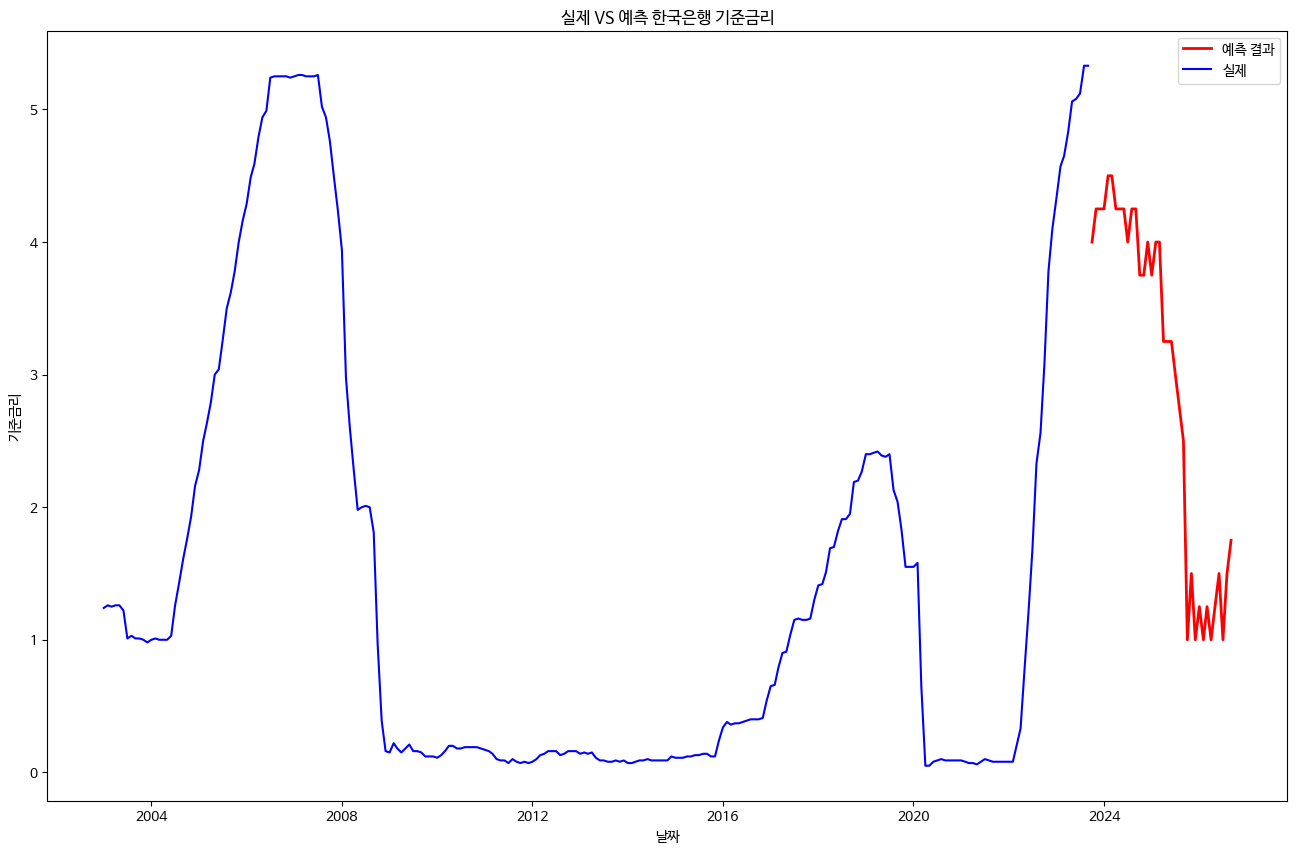

In [ ]:
for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])
for_plot_pred['날짜'] = pd.to_datetime(for_plot_pred['날짜'])

plt.figure(figsize=(16, 10))

plt.plot(for_plot_pred['날짜'], for_plot_pred['기준금리'], label='예측 결과', c = 'r',  linewidth=2)
plt.plot(for_plot['날짜'], for_plot['미_금리'], label='실제', c = 'b')

plt.title('실제 VS 예측 한국은행 기준금리')

plt.xlabel('날짜')

plt.ylabel('기준금리')

plt.legend()

plt.show()

## 6.4 0.25 % 단위로 스케일링

In [ ]:
ㄷreference_values = np.arange(0, 5, 0.25)
ag_result_df['mean_0.25_cut'] = ag_result_df['mean_0.25'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x)))

ag_result_df['mean_0.25_cut']

0     4.00
1     4.00
2     4.25
3     4.25
4     4.25
5     4.50
6     4.25
7     4.25
8     4.25
9     4.25
10    4.00
11    4.25
12    4.00
13    3.75
14    3.75
15    4.00
16    3.75
17    4.00
18    3.75
19    3.25
20    3.25
21    3.25
22    3.00
23    2.75
24    2.50
25    2.25
26    2.00
27    1.75
28    1.25
29    1.00
30    1.25
31    1.00
32    1.25
33    1.00
34    1.50
35    1.75
Name: mean_0.25_cut, dtype: float64

- 추가로 한번에 0.5 이상의 움직임을 보이는 경우, 바로 이전 값에서 0.25 변한 값으로 반환한다.

In [ ]:
for i in range(1, len(ag_result_df)):
    diff = ag_result_df.loc[i, 'mean_0.25_cut'] - ag_result_df.loc[i-1, 'mean_0.25_cut']

    # 조건 1: 값이 0.5 이상 작아졌을 때, 0.25만큼만 하락된 값이 반영되도록 스무딩
    if diff <= -0.5:
        ag_result_df.loc[i, 'mean_0.25_cut'] = ag_result_df.loc[i-1, 'mean_0.25_cut'] - 0.25

    # 조건 2: 값이 0.5 이상 커졌을 , 0.25만큼만 상승된 값이 반영되도록 스무딩
    elif diff >= 0.5:
        ag_result_df.loc[i, 'mean_0.25_cut'] = ag_result_df.loc[i-1, 'mean_0.25_cut'] + 0.25

In [ ]:
for_plot = eco_df[['날짜', '미_금리']]
for_plot_pred = ag_result_df[['날짜','mean_0.25_cut']].rename(columns = {'mean_0.25_cut':'기준금리'})

<ipython-input-177-4ffb18fa6cc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])


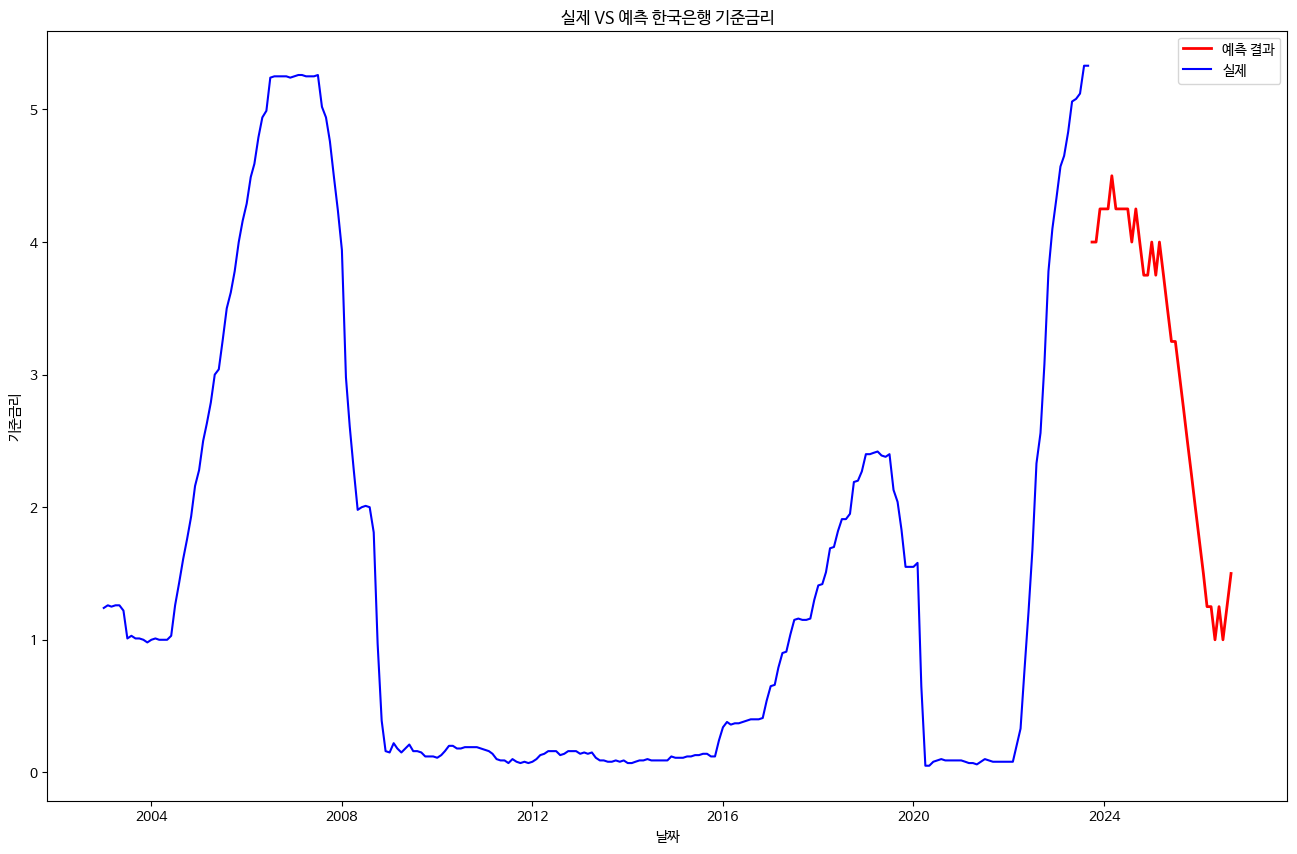

In [ ]:
for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])
for_plot_pred['날짜'] = pd.to_datetime(for_plot_pred['날짜'])

plt.figure(figsize=(16, 10))

plt.plot(for_plot_pred['날짜'], for_plot_pred['기준금리'], label='예측 결과', c = 'r',  linewidth=2)
plt.plot(for_plot['날짜'], for_plot['미_금리'], label='실제', c = 'b')

plt.title('실제 VS 예측 한국은행 기준금리')

plt.xlabel('날짜')

plt.ylabel('기준금리')

plt.legend()

plt.show()

## 6.5 이동평균 (Rolling)

In [ ]:
window_size = 2
ag_result_df['mean_0.25_roll'] = ag_result_df['mean_total'].rolling(window=window_size).mean()

In [ ]:
reference_values = np.arange(0, 10, 0.25)
ag_result_df['mean_0.25_roll'] = ag_result_df['mean_0.25'].apply(lambda x: min(reference_values, key=lambda v: abs(v - x)))

ag_result_df['mean_0.25_roll']

0     4.00
1     4.00
2     4.25
3     4.25
4     4.25
5     4.50
6     4.25
7     4.25
8     4.25
9     4.25
10    4.00
11    4.25
12    4.00
13    3.75
14    3.75
15    4.00
16    3.75
17    4.00
18    3.75
19    3.25
20    3.25
21    3.25
22    3.00
23    2.75
24    2.50
25    2.25
26    2.00
27    1.75
28    1.25
29    1.00
30    1.25
31    1.00
32    1.25
33    1.00
34    1.50
35    1.75
Name: mean_0.25_roll, dtype: float64

<ipython-input-181-fb0875b99542>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])


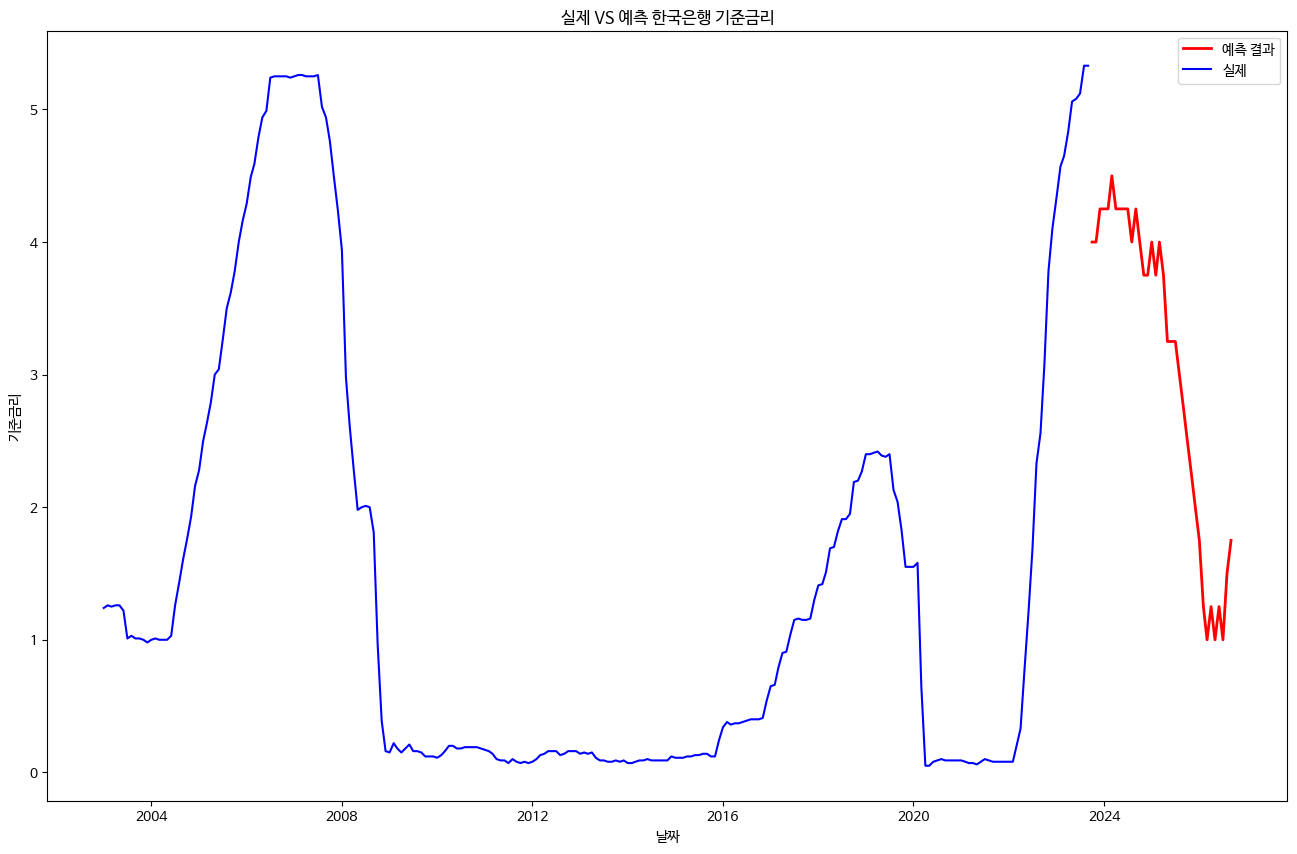

In [ ]:
for_plot = eco_df[['날짜', '미_금리']]
for_plot_pred = ag_result_df[['날짜','mean_0.25_roll']].rename(columns = {'mean_0.25_roll':'기준금리'})

for_plot['날짜'] = pd.to_datetime(for_plot['날짜'])
for_plot_pred['날짜'] = pd.to_datetime(for_plot_pred['날짜'])

plt.figure(figsize=(16, 10))

plt.plot(for_plot_pred['날짜'], for_plot_pred['기준금리'], label='예측 결과', c = 'r',  linewidth=2)
plt.plot(for_plot['날짜'], for_plot['미_금리'], label='실제', c = 'b')

plt.title('실제 VS 예측 한국은행 기준금리')

plt.xlabel('날짜')

plt.ylabel('기준금리')

plt.legend()

plt.show()